In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import numpy as np
from google.colab import drive
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.cm as cm
from scipy.stats import chi2_contingency
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression




In [ ]:
file_link = 'https://drive.google.com/file/d/1UQGgt7Hz2XI-aWltk7--BZHSwul1ATgR/view?usp=sharing'
file_id = file_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_link)

df.shape

(494016, 43)

In [ ]:
file_link = 'https://drive.google.com/file/d/1wvlV59p9qtlwgFUKxXKGcrZ-iLaAO4aL/view?usp=sharing'
file_id = file_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?id={file_id}'
df1 = pd.read_csv(download_link)

df1.shape

(292298, 43)

In [ ]:
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        217       2032     0   
1         0           tcp    http   SF        212       1940     0   
2         0           tcp    http   SF        159       4087     0   
3         0           tcp    http   SF        210        151     0   
4         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    1  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.02   
1                     0.0                         1.00   
2                     0.0                         0.09   
3                     0.0                         0.12   
4                     0.0                         0.12   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.04                   0.0   
2                         0.04                   0.0   
3                         0.04                   0.0   
4                         0.05                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

     label  Main Label  
0  normal.      Normal  
1  normal.      Normal  
2  normal.      Normal  
3  normal.      Normal  
4  normal.      Normal  

[5 rows x 43 columns]

In [ ]:

df1.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           udp   private   SF        105        146     0   
1         0           udp   private   SF        105        146     0   
2         0           udp   private   SF        105        146     0   
3         0           udp  domain_u   SF         29          0     0   
4         0           udp   private   SF        105        146     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    1.00   
1               0       0    0  ...                    1.00   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    0.30   
4               0       0    0  ...                    0.99   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.01                          0.0   
1                    0.01                          0.0   
2                    0.01                          0.0   
3                    0.30                          0.3   
4                    0.01                          0.0   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

     label  Main Label  
0  normal.      Normal  
1  normal.      Normal  
2  normal.      Normal  
3  normal.      Normal  
4  normal.      Normal  

[5 rows x 43 columns]

In [ ]:
df.drop(columns=['label', 'num_outbound_cmds', 'is_host_login'], inplace=True)
df.head()


duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        217       2032     0   
1         0           tcp    http   SF        212       1940     0   
2         0           tcp    http   SF        159       4087     0   
3         0           tcp    http   SF        210        151     0   
4         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  59   
1               0       0    0  ...                  69   
2               0       0    0  ...                  79   
3               0       0    0  ...                  89   
4               0       0    1  ...                  99   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.02                         0.00   
1                         1.00                         0.04   
2                         0.09                         0.04   
3                         0.12                         0.04   
4                         0.12                         0.05   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  Main Label  
0                       0.0      Normal  
1                       0.0      Normal  
2                       0.0      Normal  
3                       0.0      Normal  
4                       0.0      Normal  

[5 rows x 40 columns]

In [ ]:
df1.drop(columns=['label', 'num_outbound_cmds', 'is_host_login'], inplace=True)
df1.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           udp   private   SF        105        146     0   
1         0           udp   private   SF        105        146     0   
2         0           udp   private   SF        105        146     0   
3         0           udp  domain_u   SF         29          0     0   
4         0           udp   private   SF        105        146     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 254   
1               0       0    0  ...                 254   
2               0       0    0  ...                 254   
3               0       0    0  ...                   3   
4               0       0    0  ...                 253   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    1.00                    0.01   
1                    1.00                    0.01   
2                    1.00                    0.01   
3                    0.30                    0.30   
4                    0.99                    0.01   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.3                          0.0   
4                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  Main Label  
0                       0.0      Normal  
1                       0.0      Normal  
2                       0.0      Normal  
3                       0.0      Normal  
4                       0.0      Normal  

[5 rows x 40 columns]

In [ ]:
def map_service_to_category(service):
    if service in ['http', 'http_443', 'gopher', 'ftp_data', 'www', 'link', 'remote_job', 'exec', 'csnet_ns', 'ctf', 'name', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'bgp', 'ldap', 'vmnet', 'sunrpc', 'netstat', 'X11']:
        return 'Web Services'
    elif service in ['smtp', 'imap4', 'pop_3', 'mtp', 'nntp', 'nnsp', 'efs']:
        return 'Email Services'
    elif service in ['ftp', 'ecr_i', 'ftp_data', 'tftp_u', 'uucp', 'uucp_path']:
        return 'File Transfer Services'
    elif service in ['auth', 'login', 'klogin', 'kshell', 'rje', 'shell', 'ssh']:
        return 'Authentication Services'
    elif service in ['domain', 'domain_u', 'whois', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'telnet', 'printer', 'time', 'ntp_u', 'tim_i', 'urp_i', 'pm_dump', 'urh_i']:
        return 'Network Services'
    else:
        return 'Other Services'

# Creating a new column 'main_service_category'
df['main_service_category'] = df['service'].apply(map_service_to_category)
df.drop(columns=['service'], inplace=True)

df.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0           tcp   SF        217       2032     0               0   
1         0           tcp   SF        212       1940     0               0   
2         0           tcp   SF        159       4087     0               0   
3         0           tcp   SF        210        151     0               0   
4         0           tcp   SF        212        786     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                     1.0   
1       0    0                  0  ...                     1.0   
2       0    0                  0  ...                     1.0   
3       0    0                  0  ...                     1.0   
4       0    1                  0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.02   
1                     0.0                         1.00   
2                     0.0                         0.09   
3                     0.0                         0.12   
4                     0.0                         0.12   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.04                   0.0   
2                         0.04                   0.0   
3                         0.04                   0.0   
4                         0.05                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   Main Label  main_service_category  
0      Normal           Web Services  
1      Normal           Web Services  
2      Normal           Web Services  
3      Normal           Web Services  
4      Normal           Web Services  

[5 rows x 40 columns]

In [ ]:
def map_service_to_category(service):
    if service in ['http', 'http_443', 'gopher', 'ftp_data', 'www', 'link', 'remote_job', 'exec', 'csnet_ns', 'ctf', 'name', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'bgp', 'ldap', 'vmnet', 'sunrpc', 'netstat', 'X11']:
        return 'Web Services'
    elif service in ['smtp', 'imap4', 'pop_3', 'mtp', 'nntp', 'nnsp', 'efs']:
        return 'Email Services'
    elif service in ['ftp', 'ecr_i', 'ftp_data', 'tftp_u', 'uucp', 'uucp_path']:
        return 'File Transfer Services'
    elif service in ['auth', 'login', 'klogin', 'kshell', 'rje', 'shell', 'ssh']:
        return 'Authentication Services'
    elif service in ['domain', 'domain_u', 'whois', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'telnet', 'printer', 'time', 'ntp_u', 'tim_i', 'urp_i', 'pm_dump', 'urh_i']:
        return 'Network Services'
    else:
        return 'Other Services'

df1['main_service_category'] = df1['service'].apply(map_service_to_category)
df1.drop(columns=['service'], inplace=True)

df1.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0           udp   SF        105        146     0               0   
1         0           udp   SF        105        146     0               0   
2         0           udp   SF        105        146     0               0   
3         0           udp   SF         29          0     0               0   
4         0           udp   SF        105        146     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                    1.00   
1       0    0                  0  ...                    1.00   
2       0    0                  0  ...                    1.00   
3       0    0                  0  ...                    0.30   
4       0    0                  0  ...                    0.99   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.01                          0.0   
1                    0.01                          0.0   
2                    0.01                          0.0   
3                    0.30                          0.3   
4                    0.01                          0.0   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   Main Label  main_service_category  
0      Normal         Other Services  
1      Normal         Other Services  
2      Normal         Other Services  
3      Normal       Network Services  
4      Normal         Other Services  

[5 rows x 40 columns]

In [ ]:
df.describe()

duration     src_bytes     dst_bytes           land  \
count  494016.000000  4.940160e+05  4.940160e+05  494016.000000   
mean       47.979788  3.025639e+03  8.685197e+02       0.000045   
std       707.750037  9.882231e+05  3.304017e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494016.000000  494016.000000  494016.000000      494016.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134806       0.005510       0.782107           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      30.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  494016.000000    494016.000000  ...   494016.000000   
mean        0.148238         0.010212  ...      232.472837   
std         0.355336         1.798335  ...       64.742456   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...      255.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         0.000000         0.000000  ...      255.000000   
max         1.000000       884.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       494016.000000           494016.000000           494016.000000   
mean           188.667286                0.753777                0.030906   
std            106.039748                0.410782                0.109260   
min              0.000000                0.000000                0.000000   
25%             46.000000                0.410000                0.000000   
50%            255.000000                1.000000                0.000000   
75%            255.000000                1.000000                0.040000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                494016.000000                494016.000000   
mean                      0.601940                     0.006684   
std                       0.481308                     0.042133   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       1.000000                     0.000000   
75%                       1.000000                     0.000000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         494016.000000             494016.000000         494016.000000   
mean               0.176756                  0.176444              0.058118   
std                0.380595                  0.380921              0.230591   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             494016.000000  
mean                   0.057412  
std                    0.230141  
min                    0.000000  
25

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494016 entries, 0 to 494015
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494016 non-null  int64  
 1   protocol_type                494016 non-null  object 
 2   flag                         494016 non-null  object 
 3   src_bytes                    494016 non-null  int64  
 4   dst_bytes                    494016 non-null  int64  
 5   land                         494016 non-null  int64  
 6   wrong_fragment               494016 non-null  int64  
 7   urgent                       494016 non-null  int64  
 8   hot                          494016 non-null  int64  
 9   num_failed_logins            494016 non-null  int64  
 10  logged_in                    494016 non-null  int64  
 11  num_compromised              494016 non-null  int64  
 12  root_shell                   494016 non-null  int64  
 13 

In [ ]:
df1.describe()

duration     src_bytes     dst_bytes           land  \
count  292298.000000  2.922980e+05  2.922980e+05  292298.000000   
mean        3.322996  1.359081e+03  7.816909e+02       0.000031   
std       245.660491  1.998405e+04  1.659184e+04       0.005549   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  1.050000e+02  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     54451.000000  6.291668e+06  5.203179e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   292298.000000  292298.000000  292298.000000      292298.000000   
mean         0.000811       0.000014       0.015460           0.002477   
std          0.041640       0.005849       0.321301           0.050323   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000     101.000000           3.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  292298.000000    292298.000000  ...   292298.000000   
mean        0.164021         0.011026  ...      234.565142   
std         0.370295         1.995425  ...       61.960680   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...      255.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         0.000000         0.000000  ...      255.000000   
max         1.000000       796.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       292298.000000           292298.000000           292298.000000   
mean           197.762031                0.788178                0.022651   
std            101.657703                0.392484                0.086977   
min              0.000000                0.000000                0.000000   
25%            236.000000                0.990000                0.000000   
50%            255.000000                1.000000                0.000000   
75%            255.000000                1.000000                0.010000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                292298.000000                292298.000000   
mean                      0.582361                     0.004665   
std                       0.487178                     0.036256   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       1.000000                     0.000000   
75%                       1.000000                     0.000000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         292298.000000             292298.000000         292298.000000   
mean               0.060538                  0.060352              0.145389   
std                0.236055                  0.237344              0.349795   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             292298.000000  
mean                   0.144660  
std                    0.350866  
min                    0.000000  
25

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292298 entries, 0 to 292297
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     292298 non-null  int64  
 1   protocol_type                292298 non-null  object 
 2   flag                         292298 non-null  object 
 3   src_bytes                    292298 non-null  int64  
 4   dst_bytes                    292298 non-null  int64  
 5   land                         292298 non-null  int64  
 6   wrong_fragment               292298 non-null  int64  
 7   urgent                       292298 non-null  int64  
 8   hot                          292298 non-null  int64  
 9   num_failed_logins            292298 non-null  int64  
 10  logged_in                    292298 non-null  int64  
 11  num_compromised              292298 non-null  int64  
 12  root_shell                   292298 non-null  int64  
 13 

In [ ]:
data_types = df.dtypes

categorical_vars = data_types[data_types == 'object'].index
numeric_vars = data_types[data_types != 'object'].index

num_categorical_vars = len(categorical_vars)
num_numeric_vars = len(numeric_vars)
print(f"Number of categorical Features: {num_categorical_vars}")
print(f"Number of numeric Features: {num_numeric_vars}")

print("\nCategorical Features:",categorical_vars)
print("\nNumeric Features:",numeric_vars)


Number of categorical Features: 4
Number of numeric Features: 36

Categorical Features: Index(['protocol_type', 'flag', 'Main Label', 'main_service_category'], dtype='object')

Numeric Features: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


In [ ]:
data_types1 = df1.dtypes

categorical_vars1 = data_types1[data_types1 == 'object'].index
numeric_vars1 = data_types1[data_types1 != 'object'].index

num_categorical_vars1 = len(categorical_vars)
num_numeric_vars1 = len(numeric_vars)
print(f"Number of categorical Features: {num_categorical_vars1}")
print(f"Number of numeric Features: {num_numeric_vars1}")

print("\nCategorical Features:",categorical_vars1)
print("\nNumeric Features:",numeric_vars1)


Number of categorical Features: 4
Number of numeric Features: 36

Categorical Features: Index(['protocol_type', 'flag', 'Main Label', 'main_service_category'], dtype='object')

Numeric Features: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [ ]:
df1.isnull().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [ ]:
print(df.shape)

(494016, 40)


In [ ]:
df1.shape

(292298, 40)

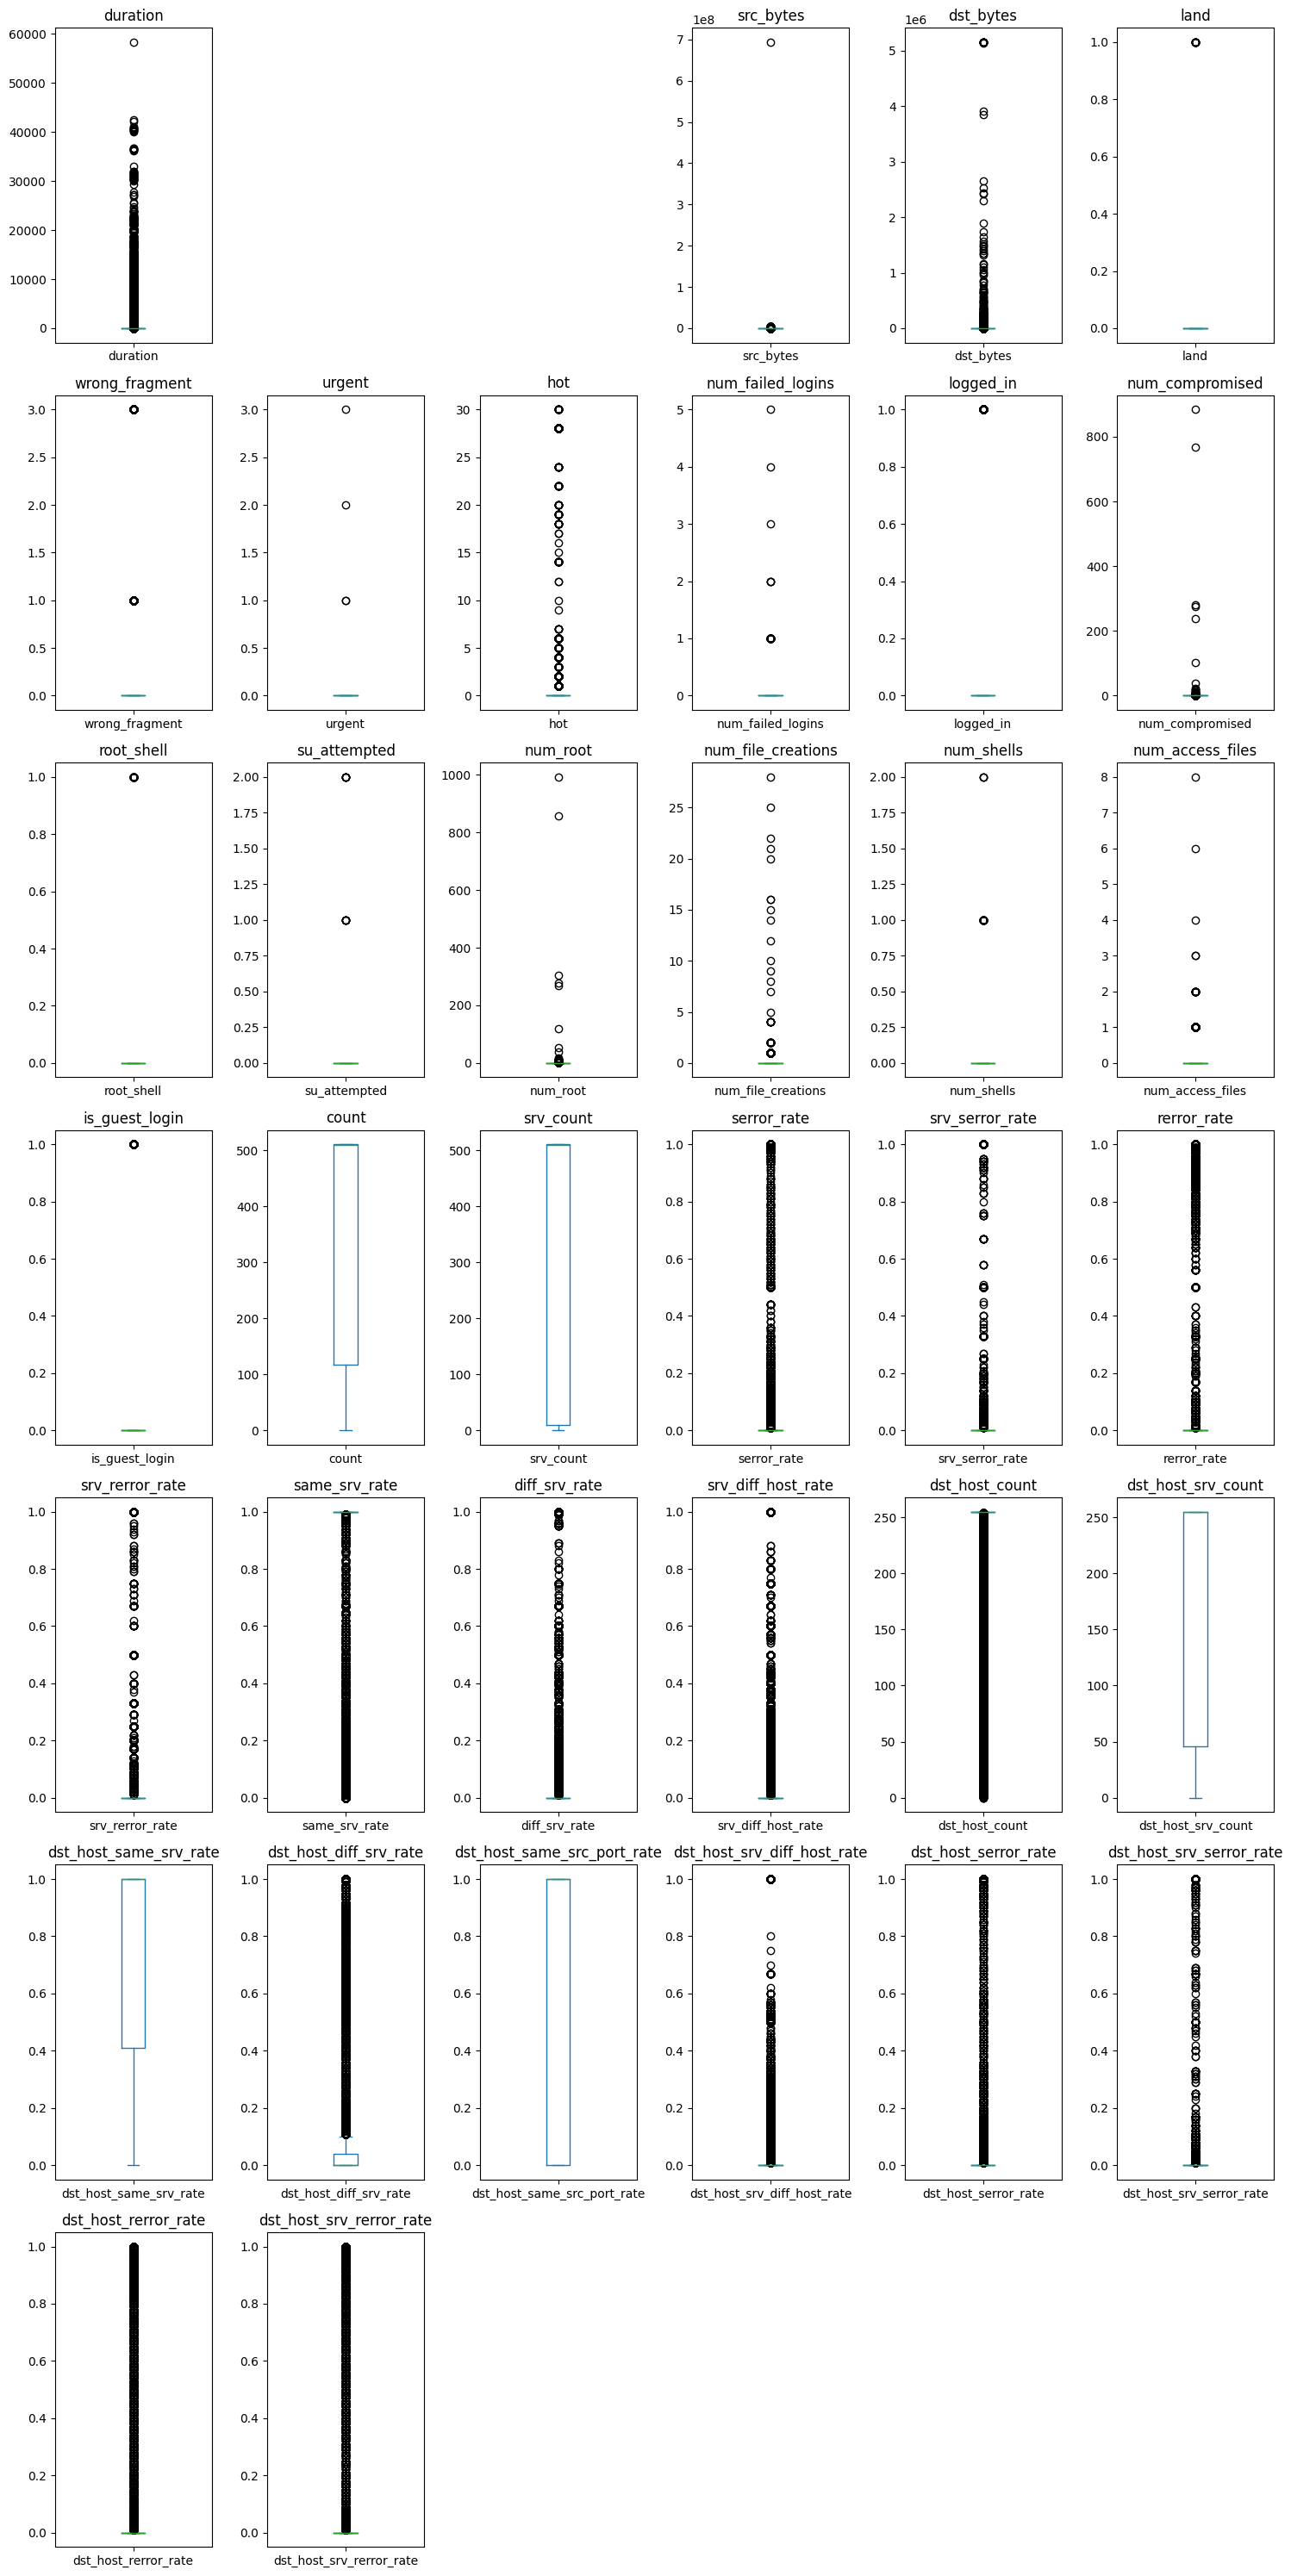

In [ ]:
num_rows = 7
num_cols = (len(df.columns) + num_rows - 1) // num_rows

plt.figure(figsize=(15, 30))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i+1)
        df[column].plot(kind='box')
        plt.title(column)

plt.tight_layout()
plt.show()


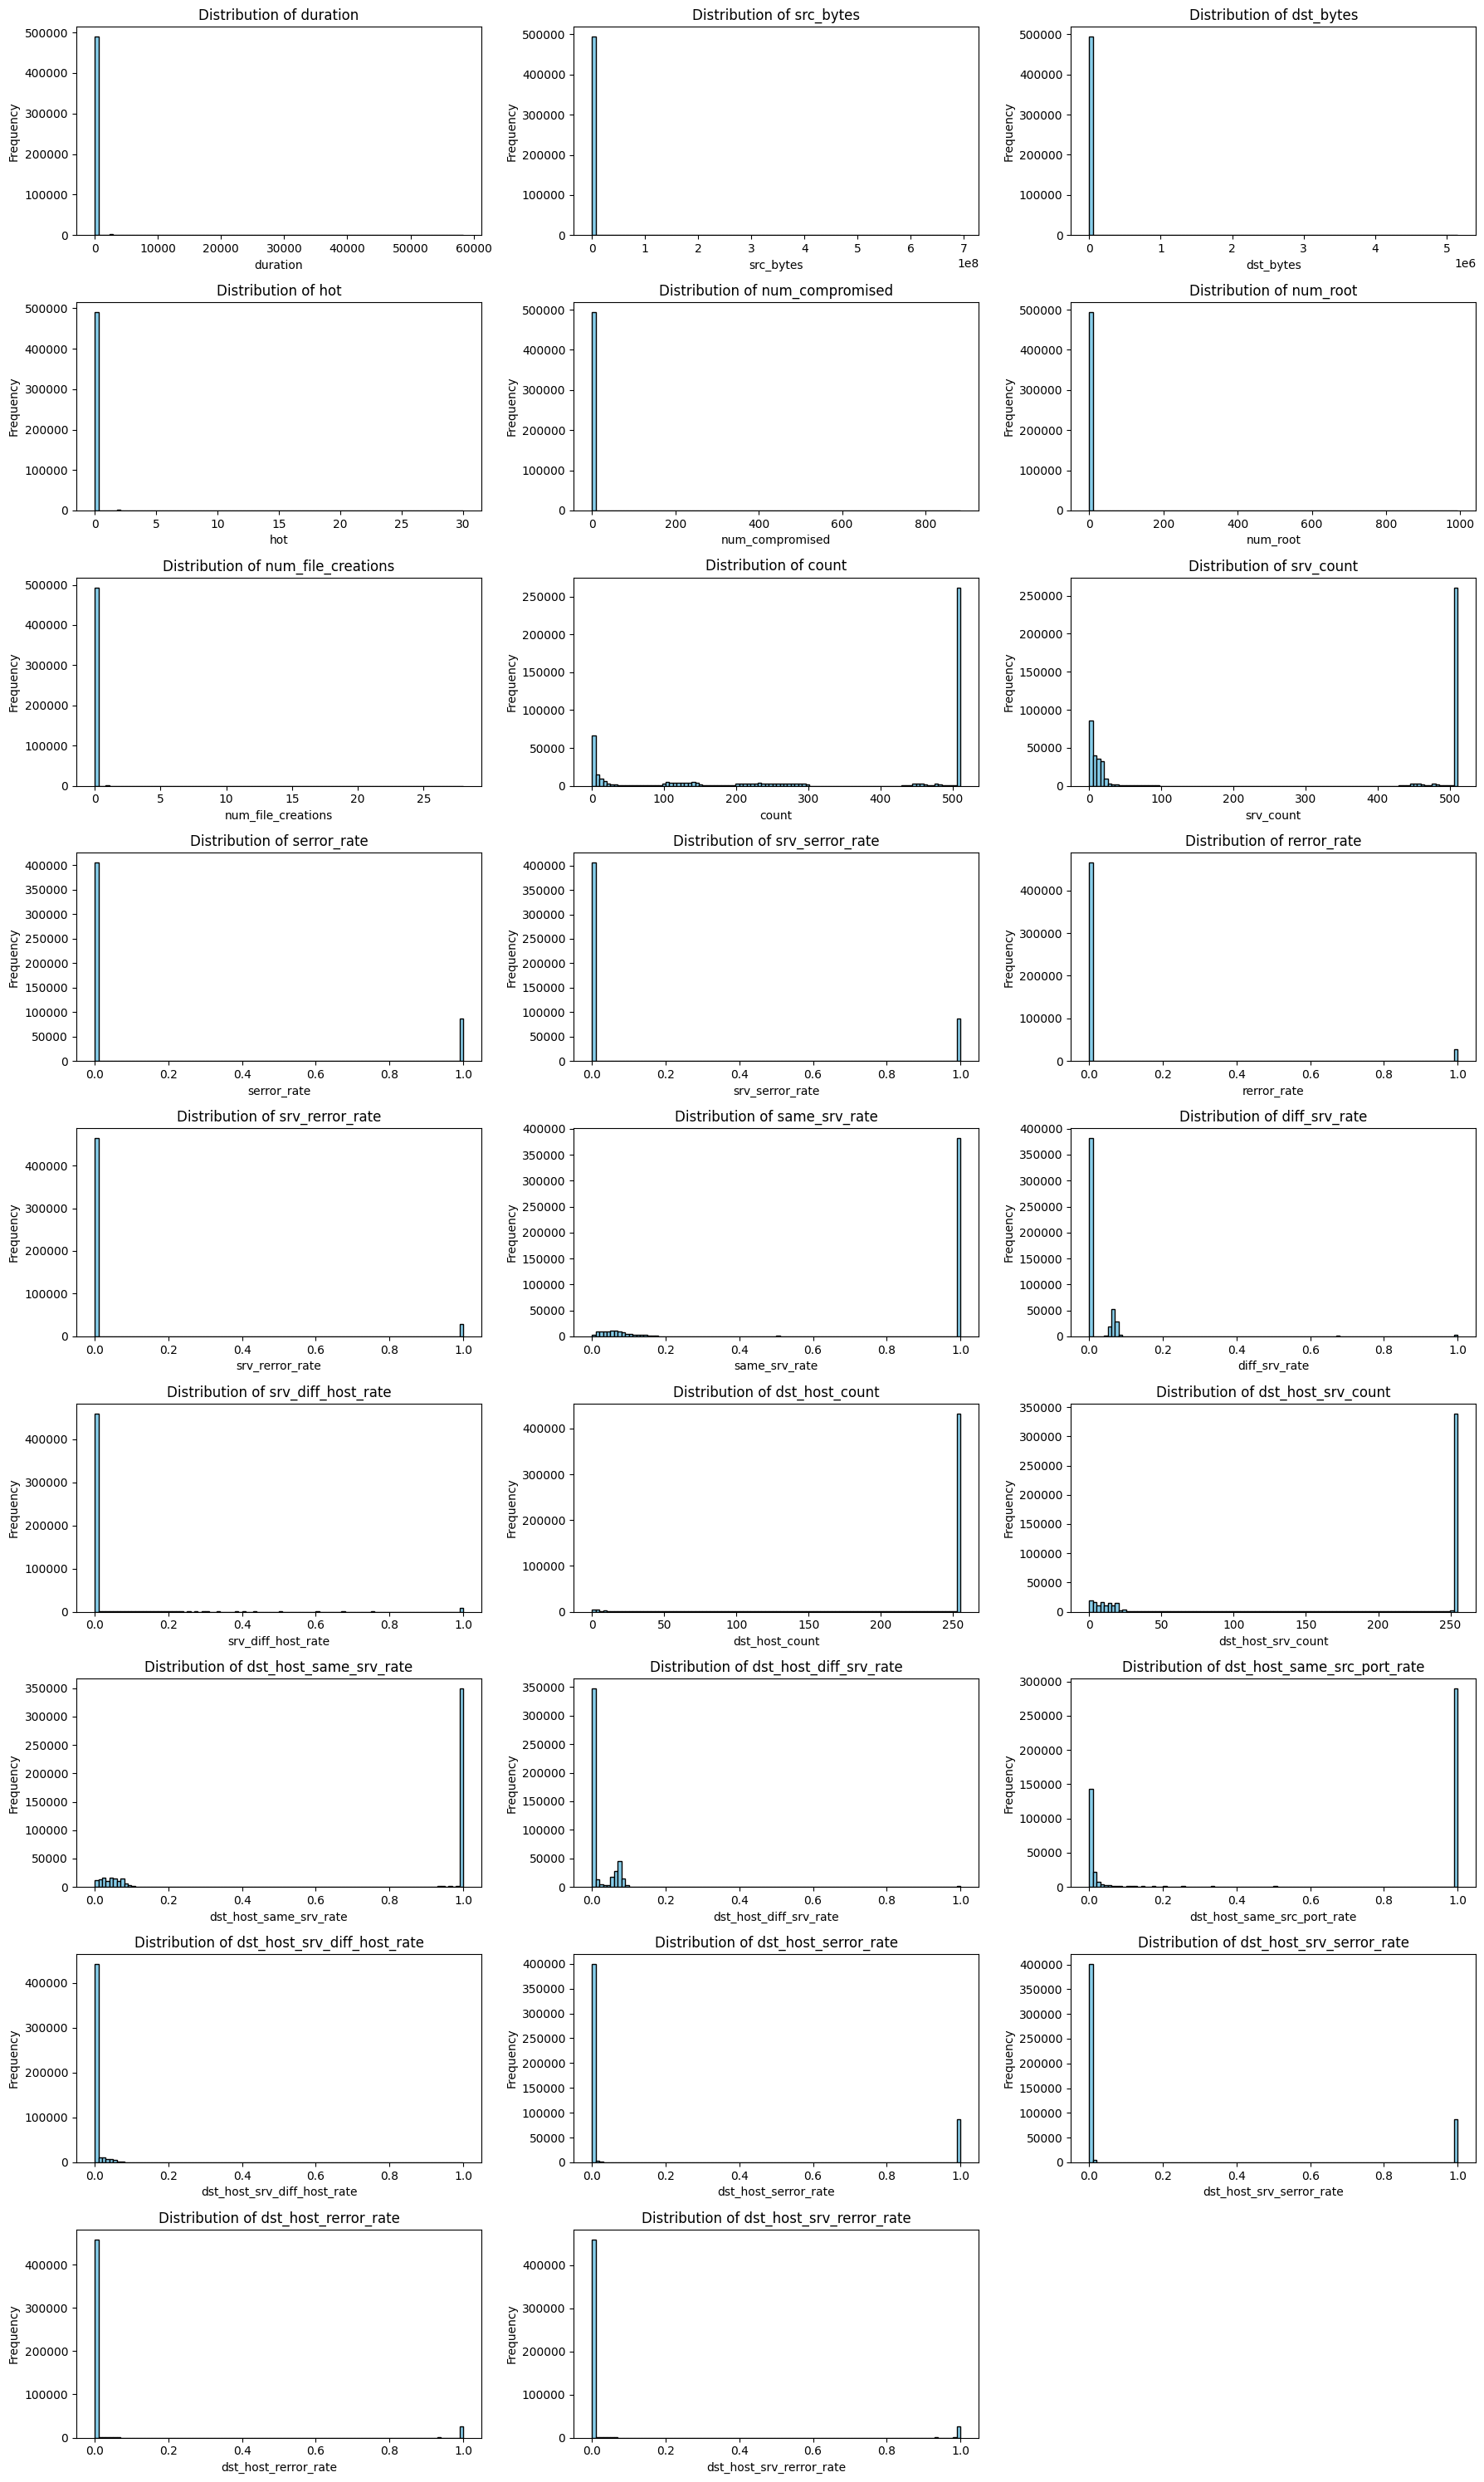

In [ ]:
columns = ['duration','src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

plt.figure(figsize=(18, 30))
for i, col in enumerate(columns, 1):
    plt.subplot(9, 3, i)
    plt.hist(df[col], bins=100, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


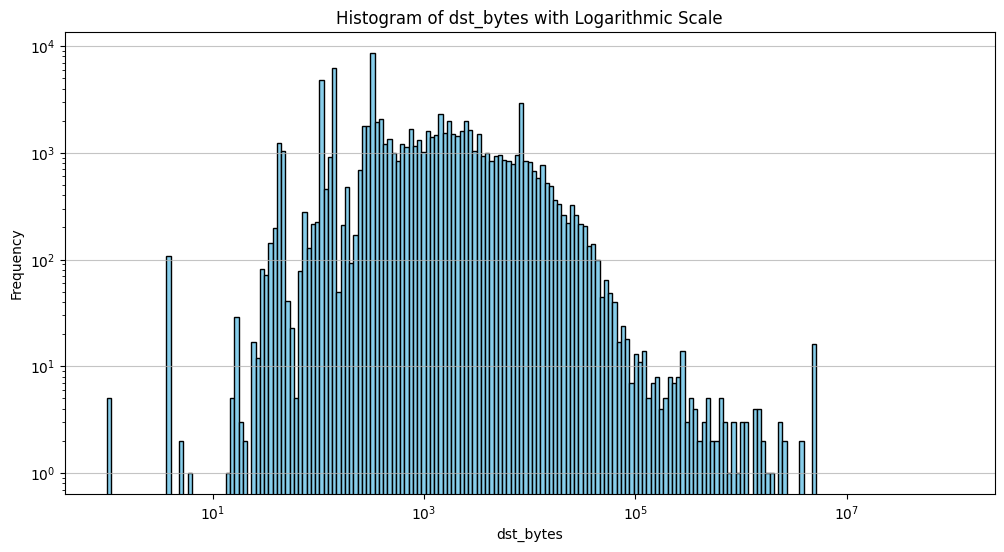

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(df['dst_bytes'], bins=np.logspace(0, 8, 200), color='skyblue', edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('dst_bytes')
plt.ylabel('Frequency')
plt.title('Histogram of dst_bytes with Logarithmic Scale')
plt.grid(axis='y', alpha=0.75)
plt.show()


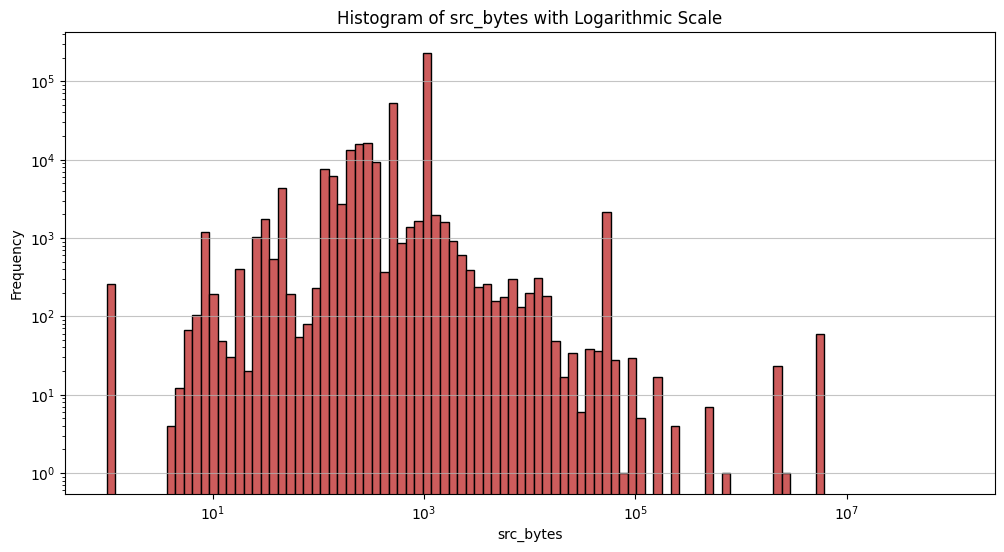

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(df['src_bytes'], bins=np.logspace(0, 8, 100), color='indianred', edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('src_bytes')
plt.ylabel('Frequency')
plt.title('Histogram of src_bytes with Logarithmic Scale')
plt.grid(axis='y', alpha=0.75)
plt.show()


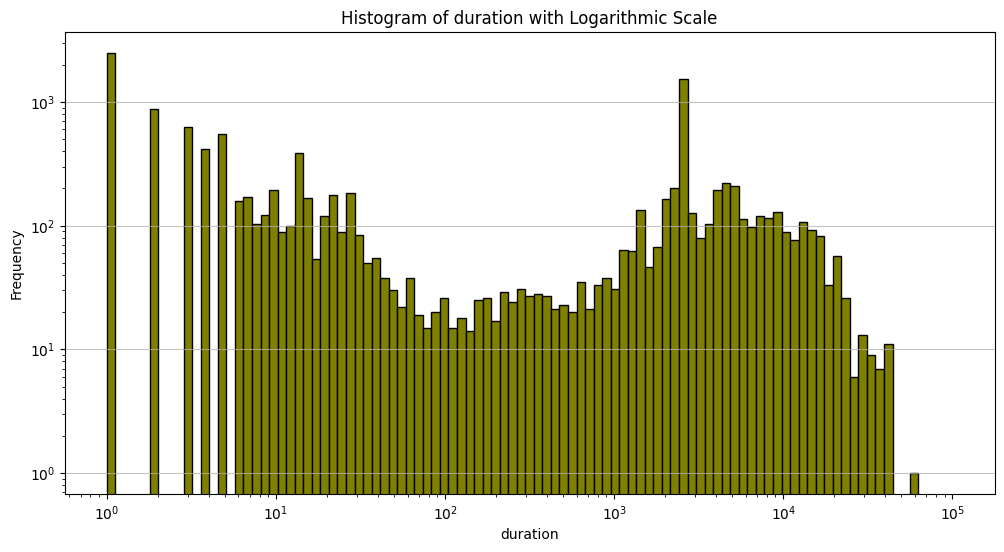

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(df['duration'], bins=np.logspace(0, 5, 100), color='olive', edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Histogram of duration with Logarithmic Scale')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
df = df[(df['duration'] <= 10000) & (df['dst_bytes'] <= 100000) & (df['src_bytes'] <= 100000)]

print("Shape of filtered DataFrame:", df.shape)

Shape of filtered DataFrame: (493126, 40)


<ipython-input-45-f006faff3ddb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, palette='husl')
<ipython-input-45-f006faff3ddb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, palette='Set2')


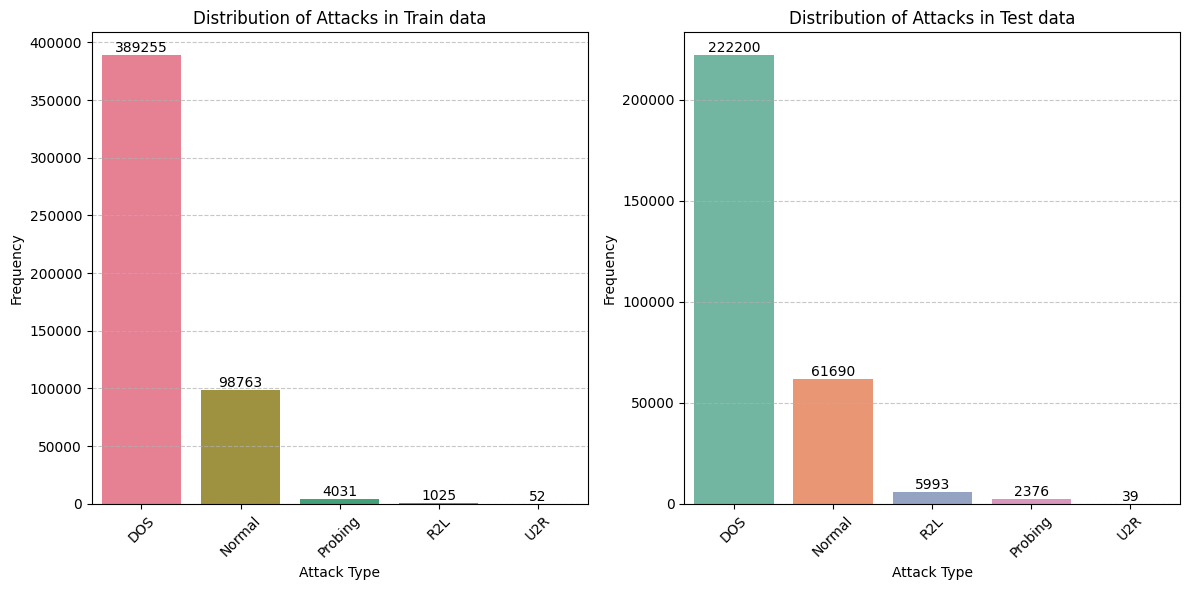

In [ ]:
plt.figure(figsize=(12, 6))
train_counts = df['Main Label'].value_counts()

test_counts = df1['Main Label'].value_counts()

plt.subplot(1, 2, 1)
sns.barplot(x=train_counts.index, y=train_counts.values, palette='husl')
plt.title('Distribution of Attacks in Train data')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(train_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.barplot(x=test_counts.index, y=test_counts.values, palette='Set2')
plt.title('Distribution of Attacks in Test data')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(test_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


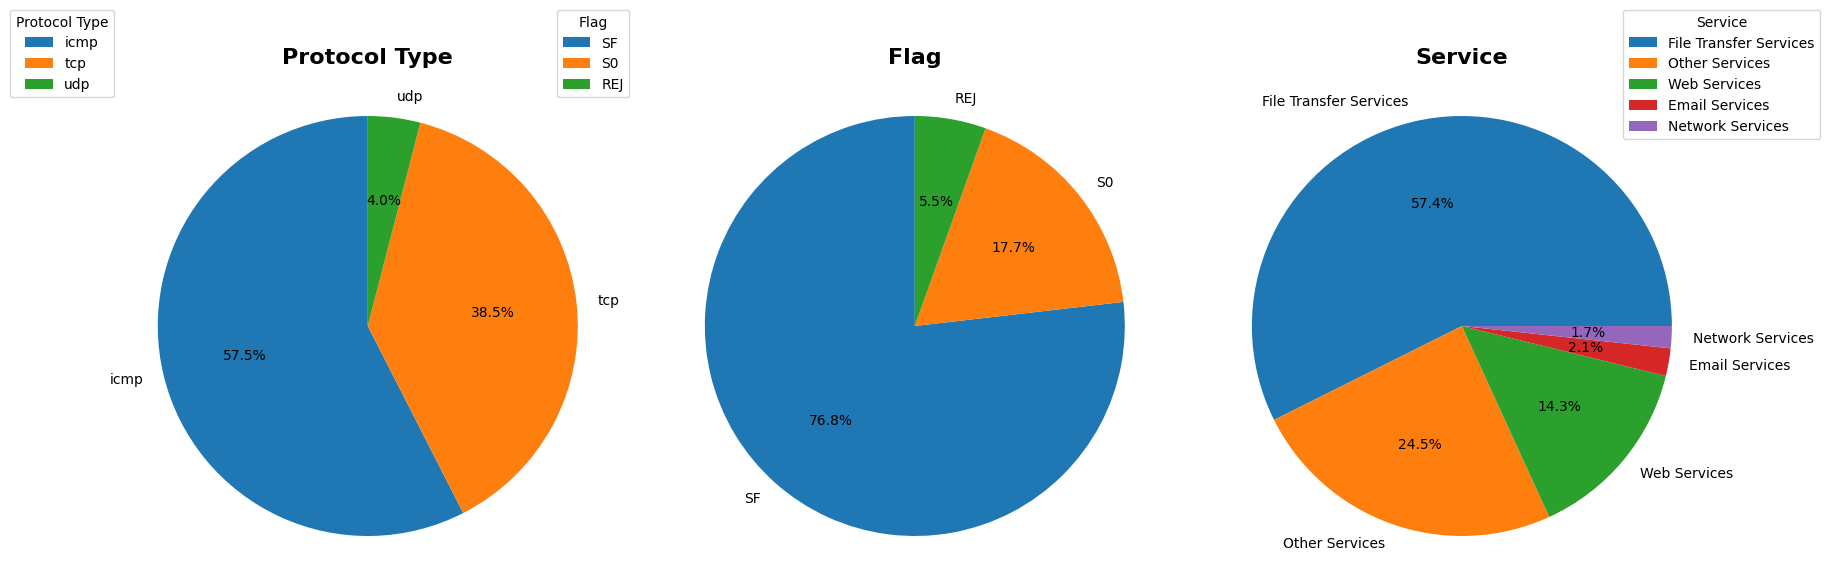

In [ ]:
protocol_type_counts = df['protocol_type'].value_counts()
flag_counts = df['flag'].value_counts()
service_counts = df['main_service_category'].value_counts()

threshold = 0.015

protocol_type_counts['Other'] = protocol_type_counts[protocol_type_counts < threshold * protocol_type_counts.sum()].sum()
protocol_type_counts = protocol_type_counts[protocol_type_counts >= threshold * protocol_type_counts.sum()]

flag_counts['Other'] = flag_counts[flag_counts < threshold * flag_counts.sum()].sum()
flag_counts = flag_counts[flag_counts >= threshold * flag_counts.sum()]

service_counts['Other'] = service_counts[service_counts < threshold * service_counts.sum()].sum()
service_counts = service_counts[service_counts >= threshold * service_counts.sum()]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].pie(protocol_type_counts, labels=protocol_type_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Protocol Type', fontsize=16, fontweight='bold', y=1.05)

axs[1].pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Flag', fontsize=16, fontweight='bold', y=1.05)
axs[2].pie(service_counts, labels=service_counts.index, autopct='%1.1f%%', startangle=0)
axs[2].set_title('Service', fontsize=16, fontweight='bold', y=1.05)

axs[0].legend(title='Protocol Type', loc='upper left', bbox_to_anchor=(-0.3, 1.2))
axs[1].legend(title='Flag', loc='upper left', bbox_to_anchor=(-0.3, 1.2))
axs[2].legend(title='Service', loc='upper right', bbox_to_anchor=(1.3, 1.2))

for ax in axs:
    ax.axis('equal')

plt.show()


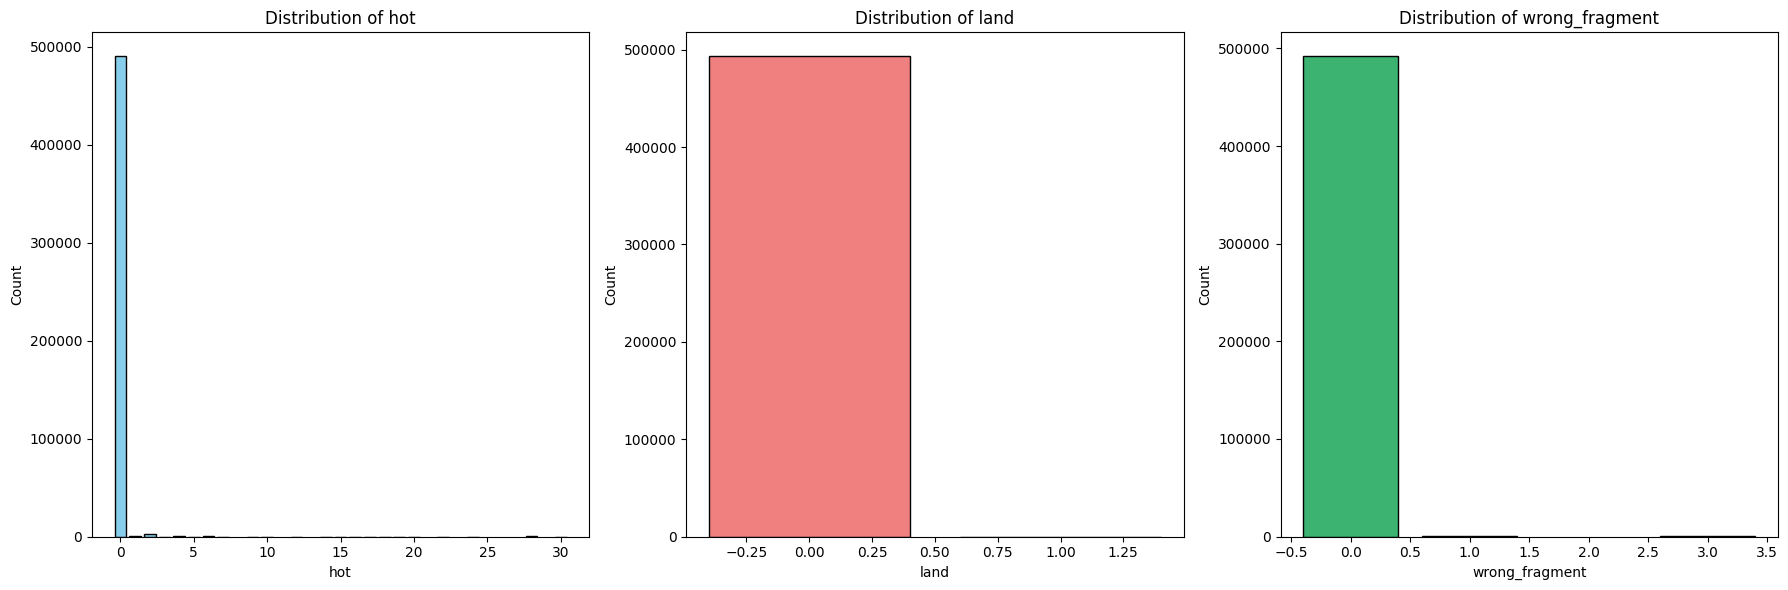

In [ ]:
hot_counts = df['hot'].value_counts()
land_counts = df['land'].value_counts()
wrong_fragment_counts = df['wrong_fragment'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(hot_counts.index, hot_counts.values, color='skyblue', edgecolor='black')
axs[0].set_xlabel('hot')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of hot')

axs[1].bar(land_counts.index, land_counts.values, color='lightcoral', edgecolor='black')
axs[1].set_xlabel('land')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of land')

axs[2].bar(wrong_fragment_counts.index, wrong_fragment_counts.values, color='mediumseagreen', edgecolor='black')
axs[2].set_xlabel('wrong_fragment')
axs[2].set_ylabel('Count')
axs[2].set_title('Distribution of wrong_fragment')

plt.tight_layout()
plt.show()


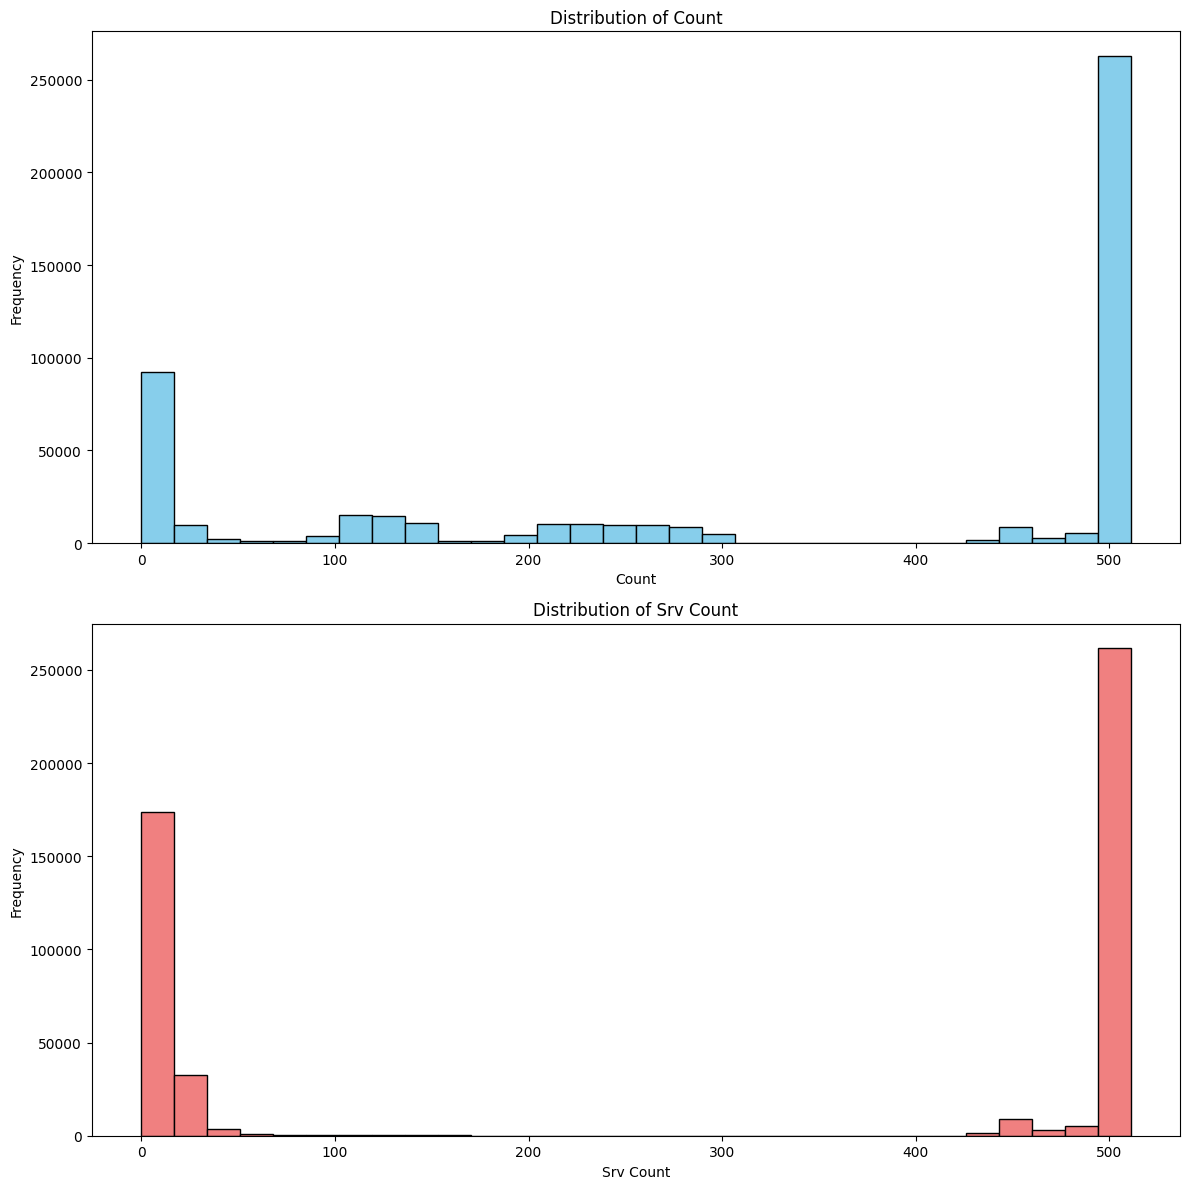

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].hist(df['count'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Count')

axs[1].hist(df['srv_count'], bins=30, color='lightcoral', edgecolor='black')
axs[1].set_xlabel('Srv Count')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Srv Count')

plt.tight_layout()
plt.show()


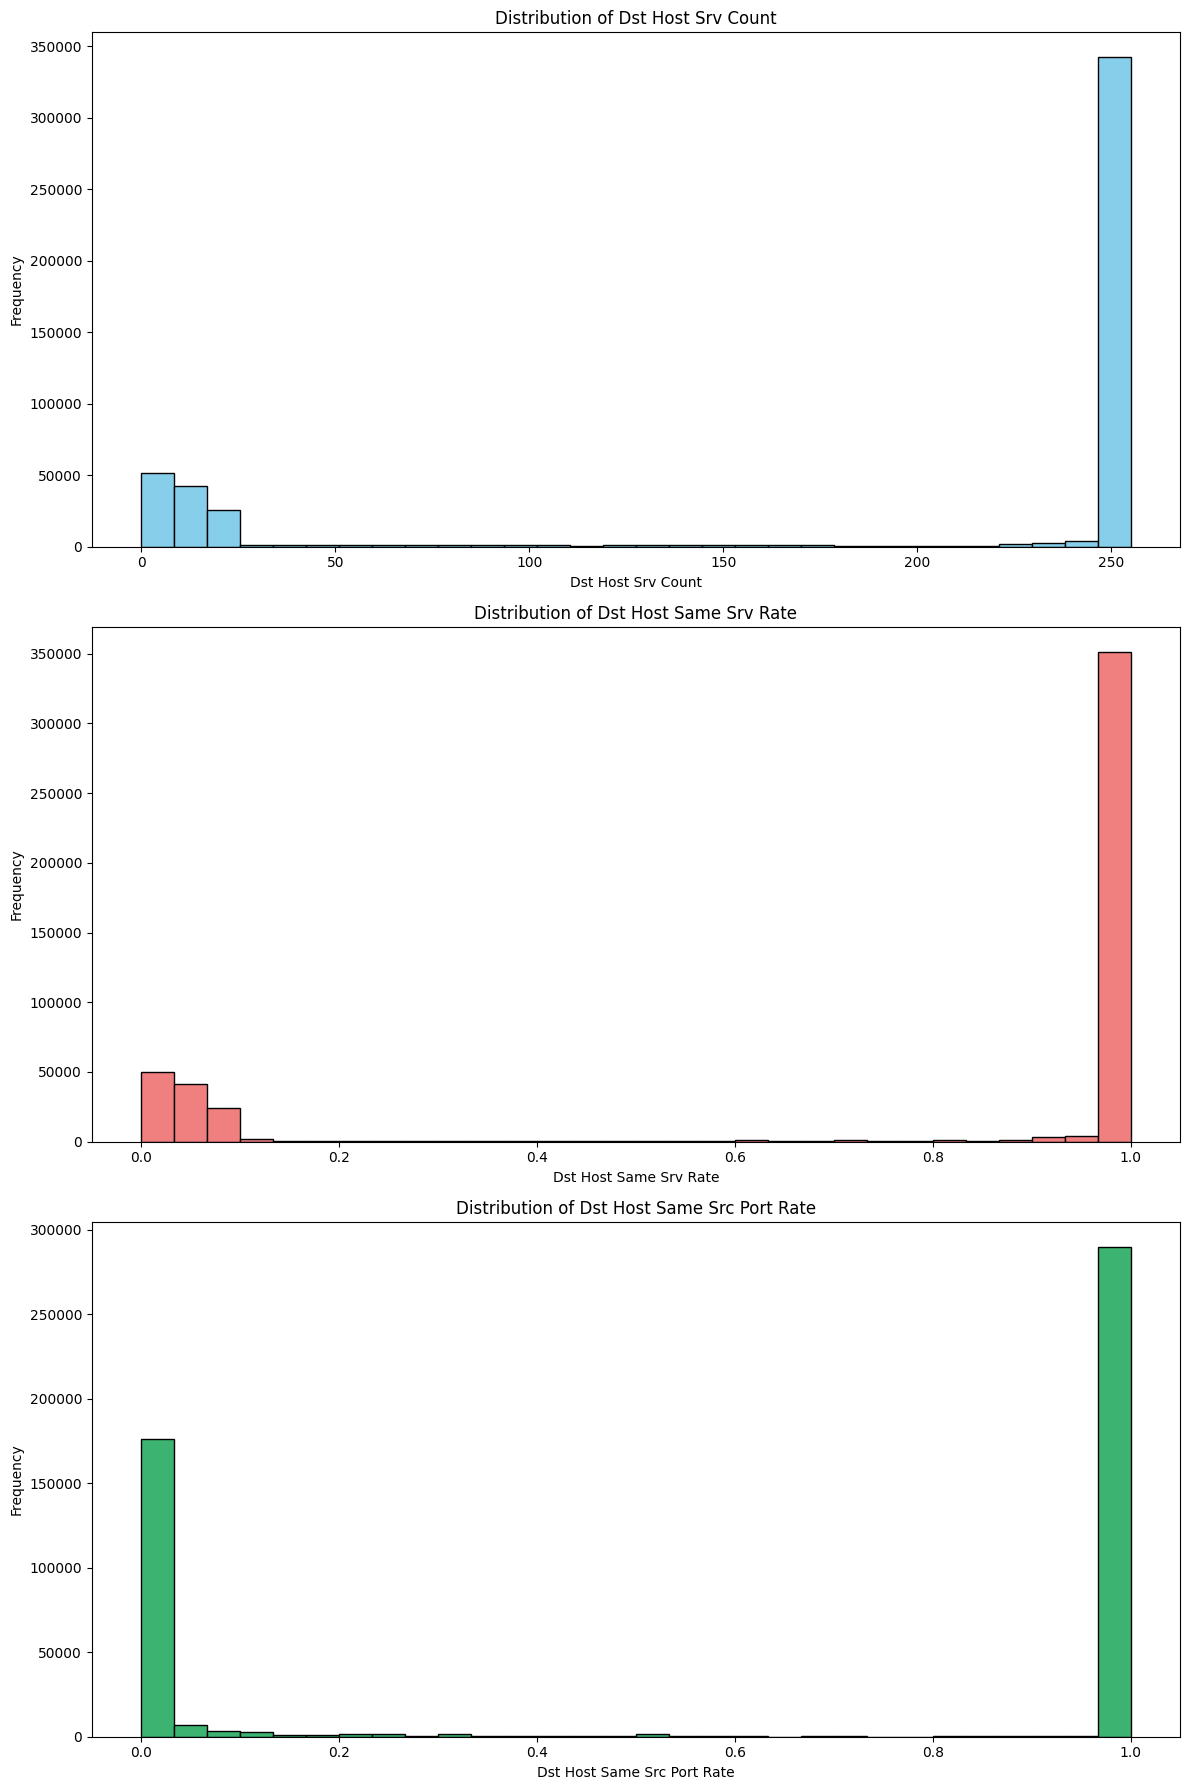

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

axs[0].hist(df['dst_host_srv_count'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Dst Host Srv Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Dst Host Srv Count')

axs[1].hist(df['dst_host_same_srv_rate'], bins=30, color='lightcoral', edgecolor='black')
axs[1].set_xlabel('Dst Host Same Srv Rate')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Dst Host Same Srv Rate')

axs[2].hist(df['dst_host_same_src_port_rate'], bins=30, color='mediumseagreen', edgecolor='black')
axs[2].set_xlabel('Dst Host Same Src Port Rate')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Dst Host Same Src Port Rate')

plt.tight_layout()
plt.show()


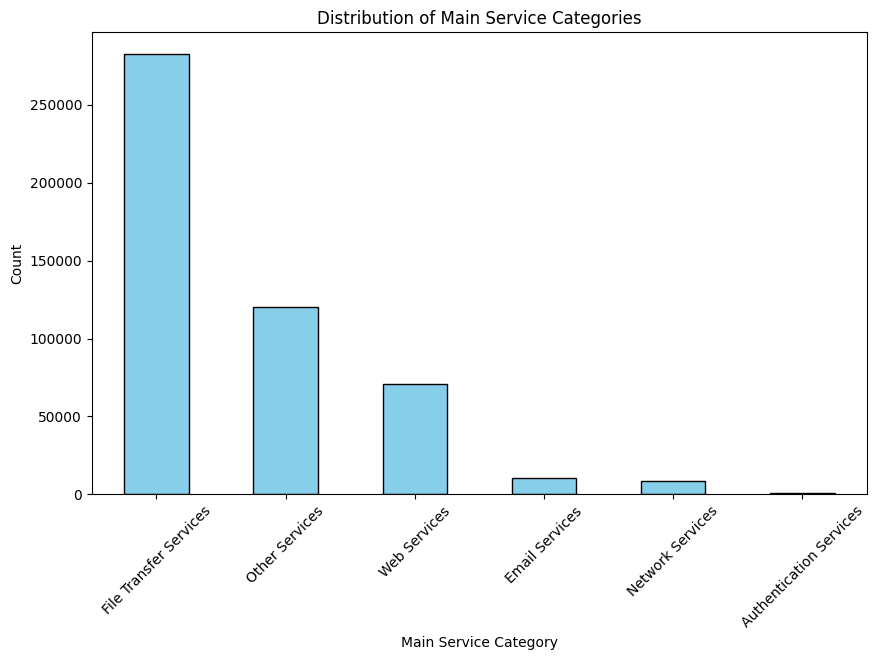

In [ ]:
service_counts = df['main_service_category'].value_counts()

plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Main Service Category')
plt.ylabel('Count')
plt.title('Distribution of Main Service Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px

fig = px.treemap(df, path=['protocol_type', 'main_service_category'], title='Treemap of Protocol Type and Service')
fig.show()


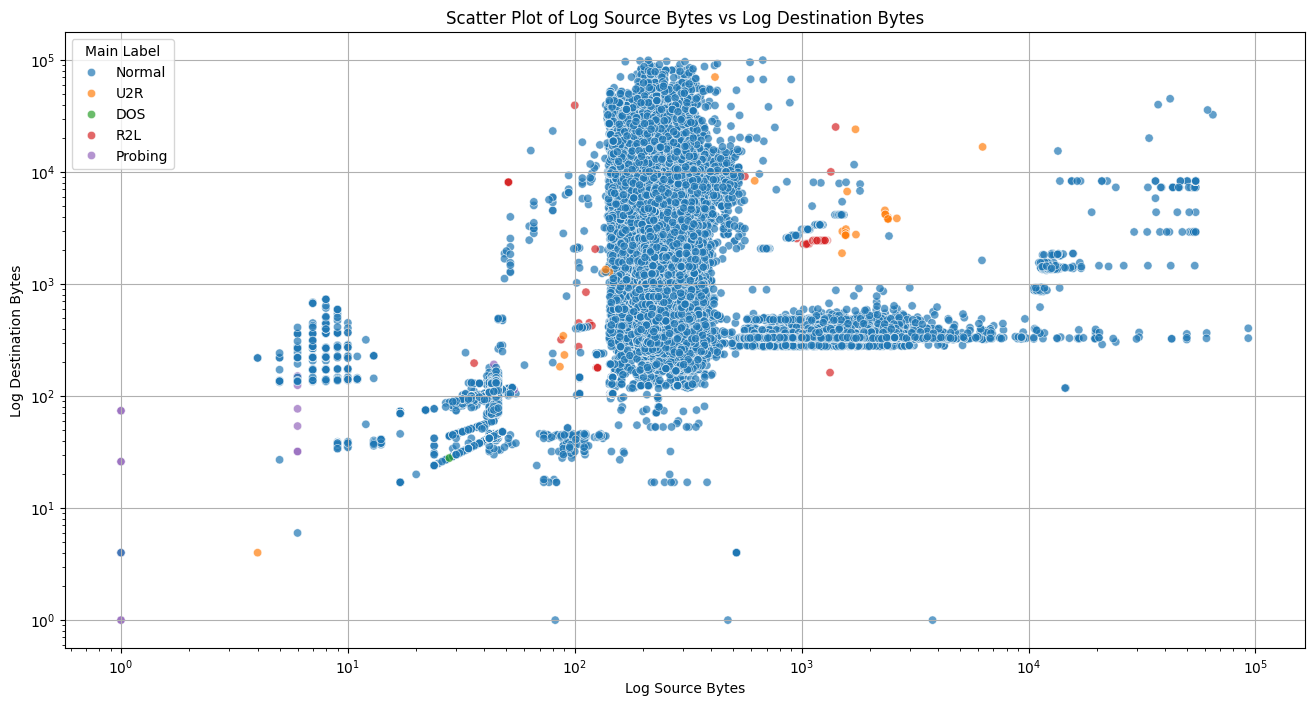

In [ ]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='src_bytes', y='dst_bytes', hue='Main Label', alpha=0.7, palette=custom_palette, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log Source Bytes')
plt.ylabel('Log Destination Bytes')
plt.title('Scatter Plot of Log Source Bytes vs Log Destination Bytes')
plt.grid(True)
plt.legend(title='Main Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



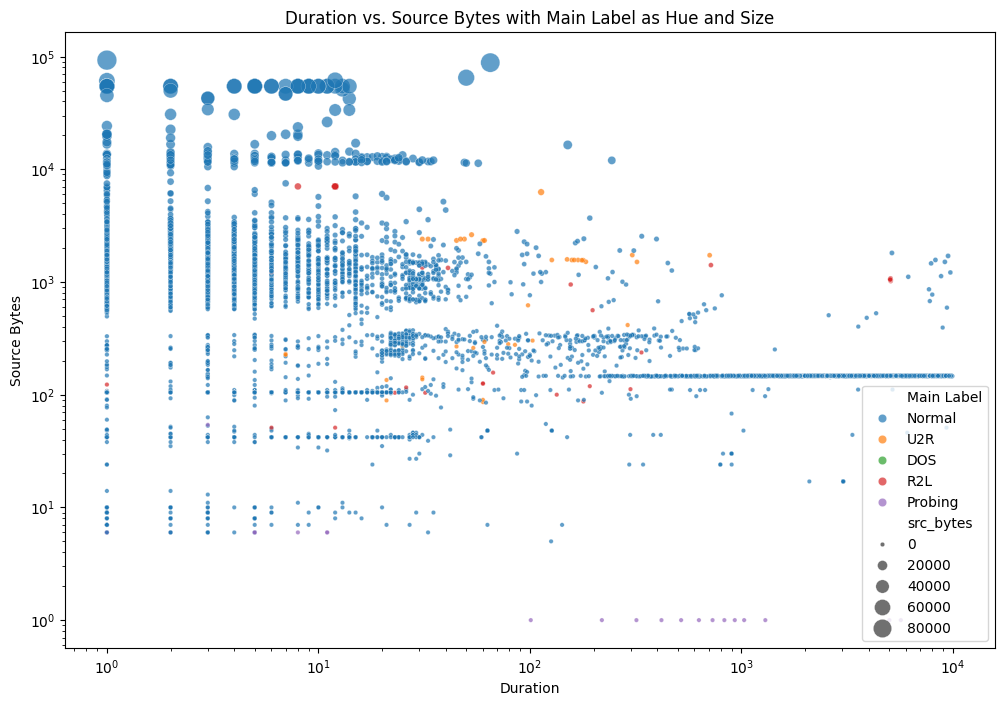

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='duration', y='src_bytes', hue='Main Label', size='src_bytes', sizes=(10, 200), alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.title('Duration vs. Source Bytes with Main Label as Hue and Size')
plt.xlabel('Duration')
plt.ylabel('Source Bytes')
plt.show()

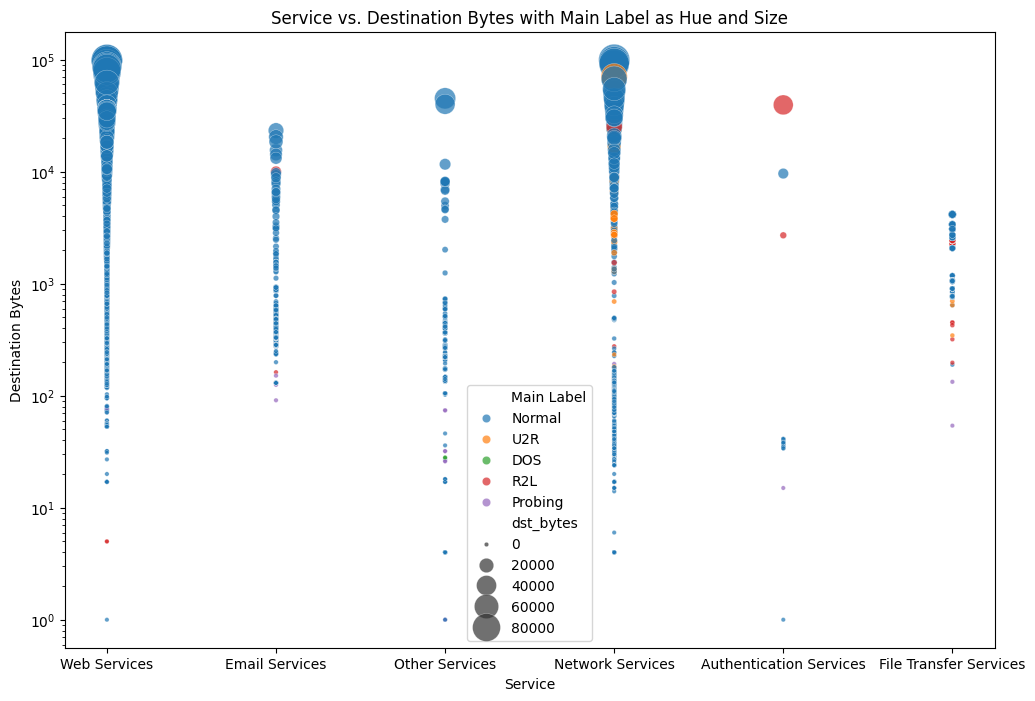

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='main_service_category', y='dst_bytes', hue='Main Label', size='dst_bytes', sizes=(10, 500), alpha=0.7)
plt.yscale('log')
plt.title('Service vs. Destination Bytes with Main Label as Hue and Size')
plt.xlabel('Service')
plt.ylabel('Destination Bytes')
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numerical_columns].corr()
corr_matrix.shape


(36, 36)

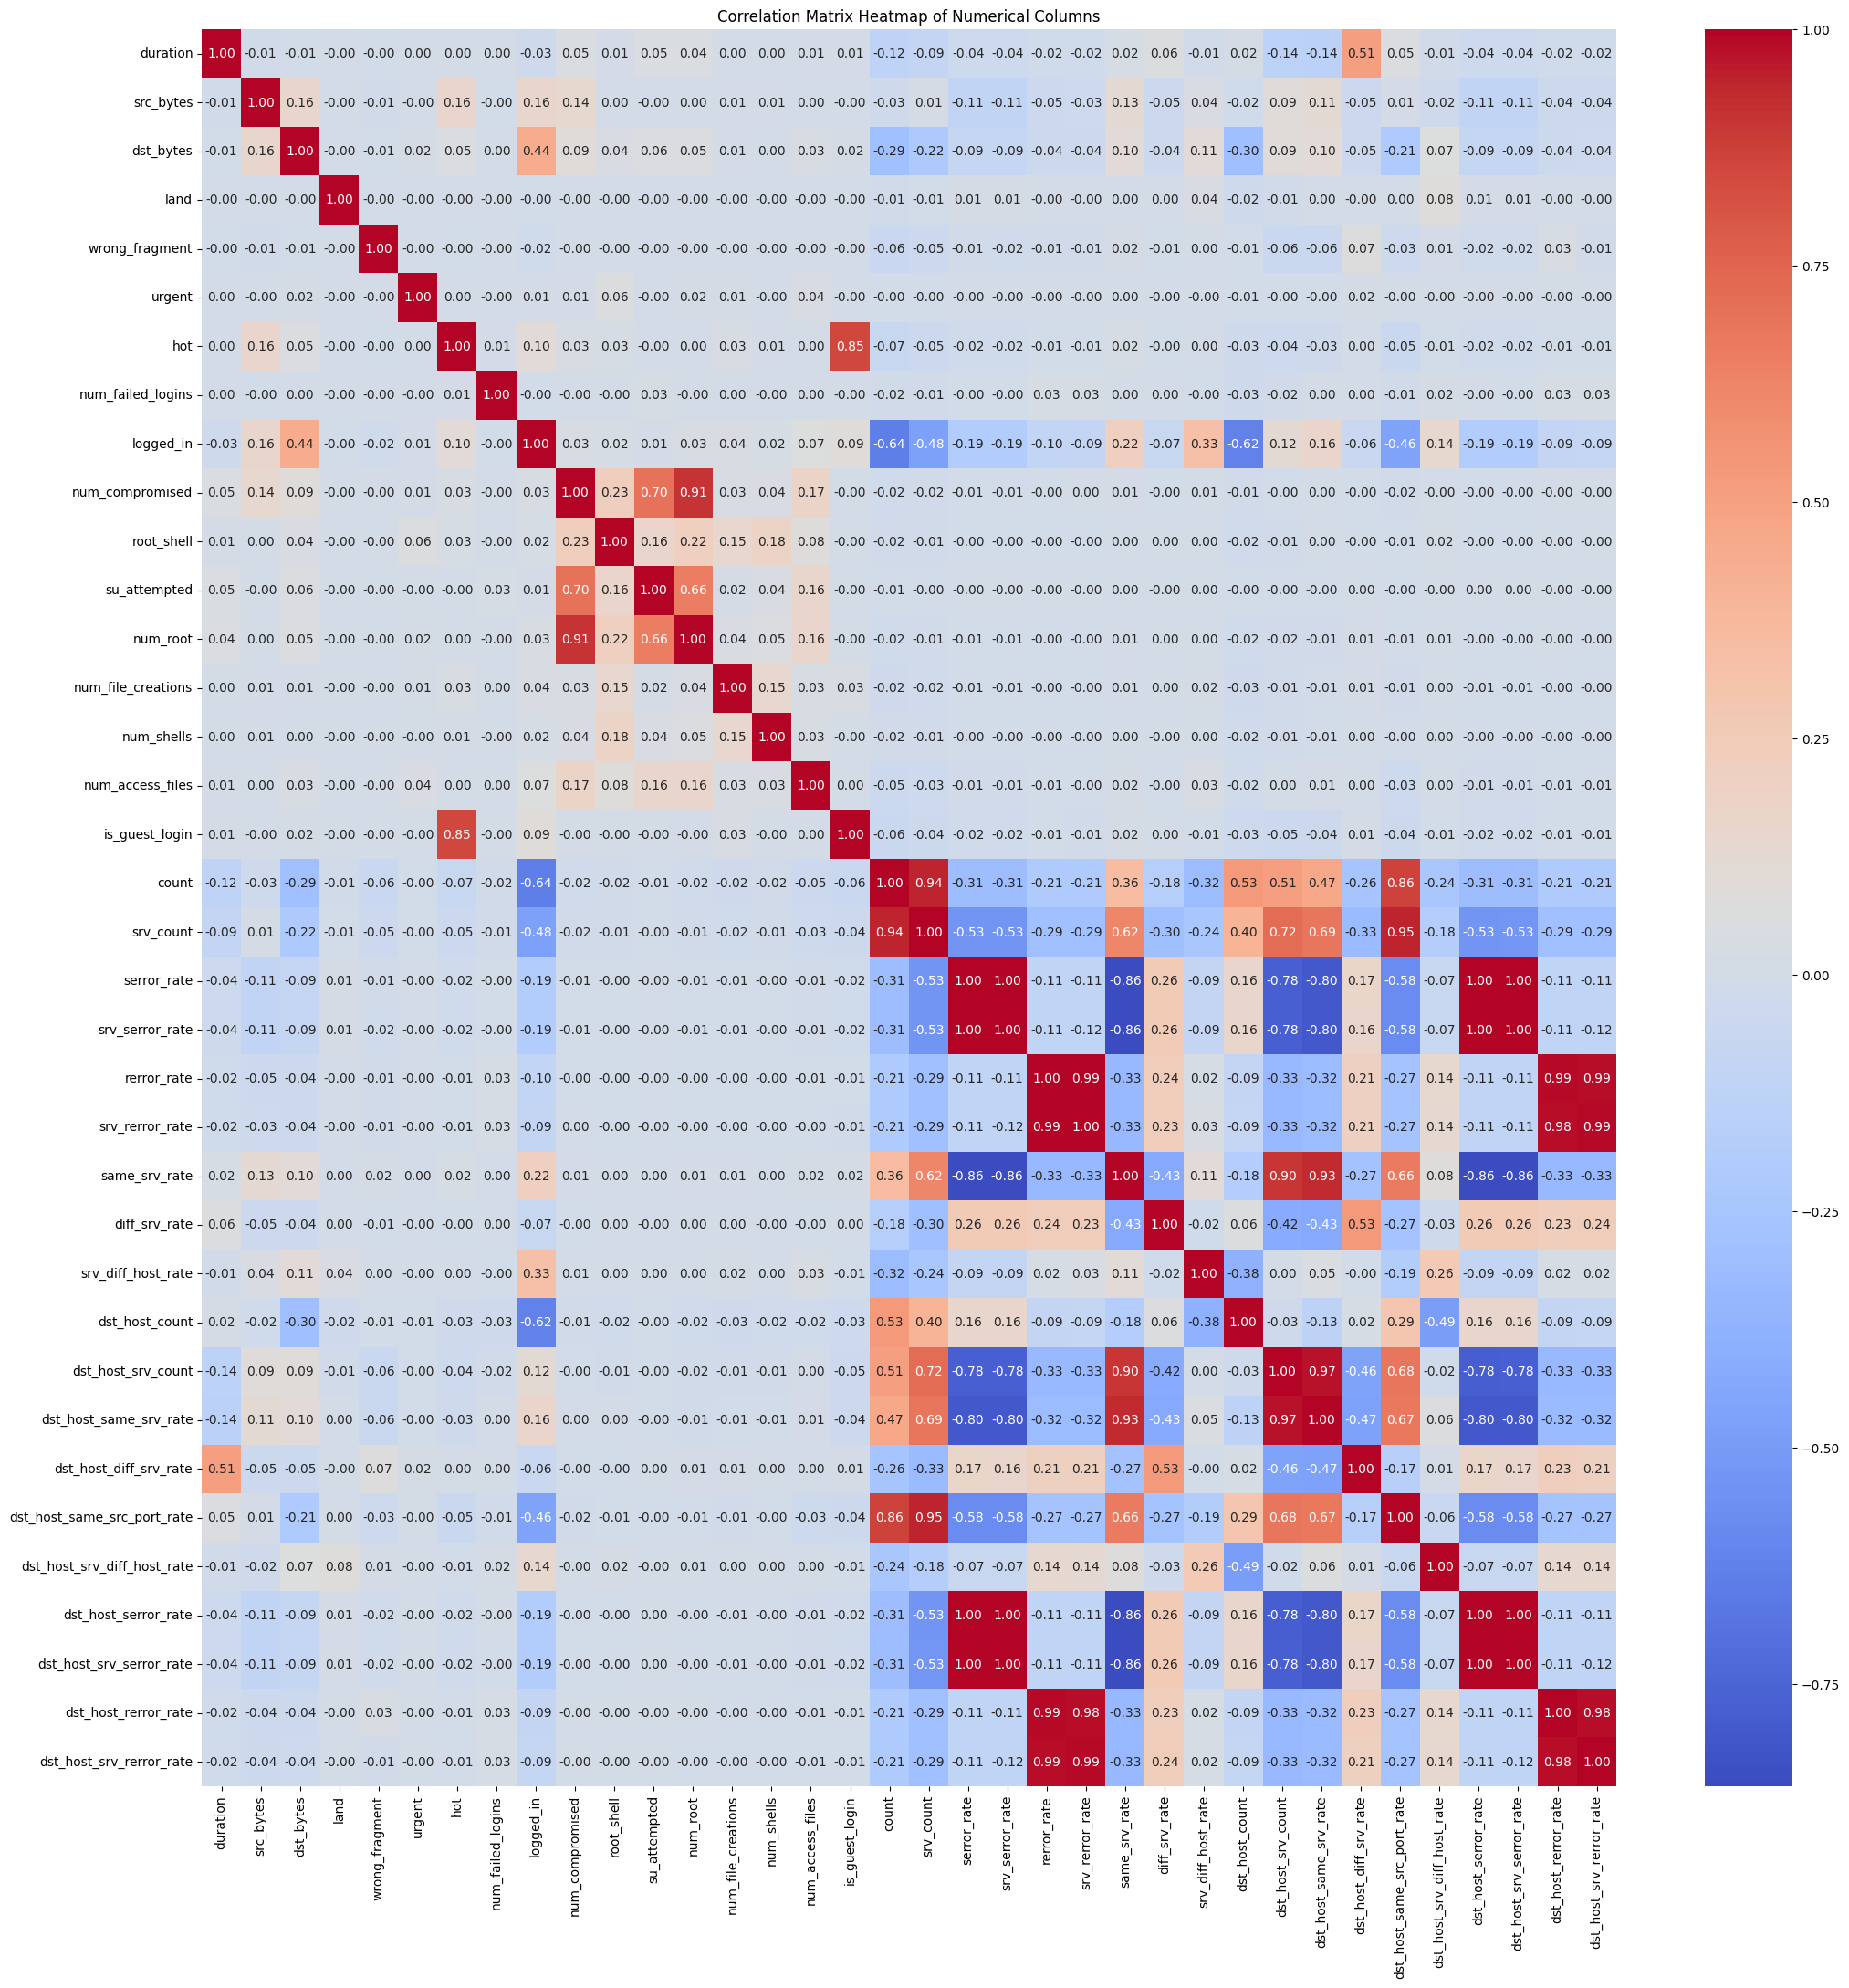

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Numerical Columns')
plt.show()


In [ ]:
import numpy as np

threshold = 0.9
dropped_columns = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            column_i = corr_matrix.columns[i]
            column_j = corr_matrix.columns[j]
            if np.var(df[column_i]) < np.var(df[column_j]):
                dropped_columns.add(column_i)
            else:
                dropped_columns.add(column_j)

print("Columns to drop:", dropped_columns)


Columns to drop: {'dst_host_same_srv_rate', 'same_srv_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate', 'count', 'serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate', 'num_compromised'}


In [ ]:
len(set(dropped_columns))

11

In [ ]:
df.drop(columns = dropped_columns , inplace = True)

In [ ]:
df1.drop(columns = dropped_columns , inplace = True)

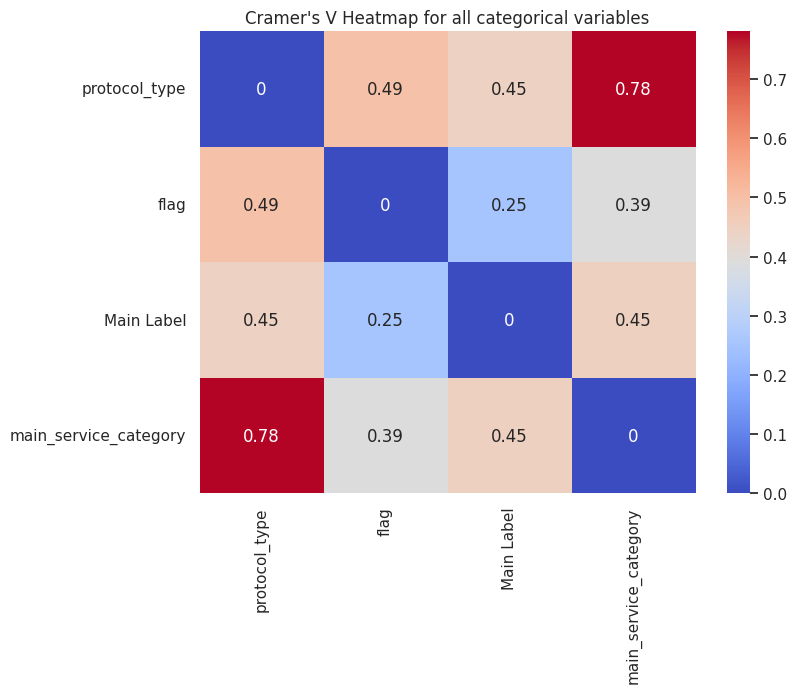

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def calculate_cramers_v(df):
    non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
    pairs = list(itertools.combinations(non_numeric_columns, 2))
    results = {}
    for col1, col2 in pairs:
        v = cramers_v(df[col1], df[col2])
        results[f'{col1}_{col2}'] = v
    return results


cramers_v_results = calculate_cramers_v(df)

non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
num_cols = len(non_numeric_columns)
cramers_v_matrix = np.zeros((num_cols, num_cols))
for i, col1 in enumerate(non_numeric_columns):
    for j, col2 in enumerate(non_numeric_columns):
        if i == j:
            continue
        pair_key = f'{col1}_{col2}'
        if pair_key in cramers_v_results:
            cramers_v_matrix[i, j] = cramers_v_results[pair_key]
            cramers_v_matrix[j, i] = cramers_v_results[pair_key]

sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cramers_v_matrix, annot=True, xticklabels=non_numeric_columns, yticklabels=non_numeric_columns, cmap='coolwarm')
plt.title("Cramer's V Heatmap for all categorical variables")
plt.show()


In [ ]:
df.shape

(493126, 29)

In [ ]:
df1.shape

(292298, 29)

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'srv_count',
       'srv_serror_rate', 'srv_rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'Main Label',
       'main_service_category'],
      dtype='object')

In [ ]:
y = df['Main Label']
y.head()
X = df.drop(columns = ['Main Label'])
X.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0           tcp   SF        217       2032     0               0   
1         0           tcp   SF        212       1940     0               0   
2         0           tcp   SF        159       4087     0               0   
3         0           tcp   SF        210        151     0               0   
4         0           tcp   SF        212        786     0               0   

   urgent  hot  num_failed_logins  ...  srv_count  srv_serror_rate  \
0       0    0                  0  ...          6              0.0   
1       0    0                  0  ...          2              0.0   
2       0    0                  0  ...          5              0.0   
3       0    0                  0  ...          8              0.0   
4       0    1                  0  ...          8              0.0   

   srv_rerror_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0              0.0            0.0                 0.0              59   
1              0.0            0.0                 1.0               1   
2              0.0            0.0                 0.0              11   
3              0.0            0.0                 0.0               8   
4              0.0            0.0                 0.0               8   

   dst_host_srv_count  dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  \
0                  59                     0.0                         0.00   
1                  69                     0.0                         0.04   
2                  79                     0.0                         0.04   
3                  89                     0.0                         0.04   
4                  99                     0.0                         0.05   

   main_service_category  
0           Web Services  
1           Web Services  
2           Web Services  
3           Web Services  
4           Web Services  

[5 rows x 28 columns]

In [ ]:
y_test = df1['Main Label']
y_test.head()
X_test = df1.drop(columns = ['Main Label'])
X_test.shape

(292298, 28)

In [ ]:
shuffled_indices = df1.index.to_numpy()
np.random.shuffle(shuffled_indices)

num_rows = len(df1)
split_point = num_rows // 2

indices_part1 = shuffled_indices[:split_point]
indices_part2 = shuffled_indices[split_point:]

df1_test = df1.loc[indices_part1]
df1_valdidation = df1.loc[indices_part2]

df1_test.sort_index(inplace=True)
df1_valdidation.sort_index(inplace=True)

In [ ]:
df1_test.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0          icmp   SF        520          0     0               0   
2         0          icmp   SF       1032          0     0               0   
5         0          icmp   SF        520          0     0               0   
6         0           udp   SF        105          0     0               0   
7         0          icmp   SF       1032          0     0               0   

   urgent  hot  num_failed_logins  ...  srv_serror_rate  srv_rerror_rate  \
0       0    0                  0  ...              0.0              0.0   
2       0    0                  0  ...              0.0              0.0   
5       0    0                  0  ...              0.0              0.0   
6       0    0                  0  ...              0.0              0.0   
7       0    0                  0  ...              0.0              0.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0             255                 255   
2            0.0                 0.0             255                 255   
5            0.0                 0.0             255                 255   
6            0.0                 0.0             255                 253   
7            0.0                 0.0             255                 255   

   dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  Main Label  \
0                    0.00                          0.0         DOS   
2                    0.00                          0.0         DOS   
5                    0.00                          0.0         DOS   
6                    0.01                          0.0      Normal   
7                    0.00                          0.0         DOS   

    main_service_category  
0  File Transfer Services  
2  File Transfer Services  
5  File Transfer Services  
6          Other Services  
7  File Transfer Services  

[5 rows x 29 columns]

In [ ]:
y_test = df1_test['Main Label']
y_test.head()
X_test = df1_test.drop(columns = ['Main Label'])
X_test.shape

(146149, 28)

In [ ]:
y_vald = df1_valdidation['Main Label']
y_vald.head()
X_vald = df1_valdidation.drop(columns = ['Main Label'])
X_vald.shape

(146149, 28)

## **STANDARDIZATION AND DUMMIES**

In [ ]:
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X.head()

duration protocol_type flag  src_bytes  dst_bytes      land  \
0 -0.077914           tcp   SF  -0.177517   0.524611 -0.006679   
1 -0.077914           tcp   SF  -0.178846   0.492404 -0.006679   
2 -0.077914           tcp   SF  -0.192927   1.244036 -0.006679   
3 -0.077914           tcp   SF  -0.179377  -0.133898 -0.006679   
4 -0.077914           tcp   SF  -0.178846   0.088406 -0.006679   

   wrong_fragment    urgent       hot  num_failed_logins  ...  srv_count  \
0       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.167324   
1       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.183568   
2       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.171385   
3       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.159201   
4       -0.047764 -0.002325  1.241168          -0.009682  ...  -1.159201   

   srv_serror_rate  srv_rerror_rate  diff_srv_rate  srv_diff_host_rate  \
0        -0.464018        -0.248435      -0.255374           -0.203679   
1        -0.464018        -0.248435      -0.255374            6.817456   
2        -0.464018        -0.248435      -0.255374           -0.203679   
3        -0.464018        -0.248435      -0.255374           -0.203679   
4        -0.464018        -0.248435      -0.255374           -0.203679   

   dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
0       -2.684384           -1.227193               -0.282188   
1       -3.581523           -1.132754               -0.282188   
2       -3.426844           -1.038315               -0.282188   
3       -3.473248           -0.943876               -0.282188   
4       -3.473248           -0.849437               -0.282188   

   dst_host_srv_diff_host_rate  main_service_category  
0                    -0.158335           Web Services  
1                     0.791278           Web Services  
2                     0.791278           Web Services  
3                     0.791278           Web Services  
4                     1.028681           Web Services  

[5 rows x 28 columns]

In [ ]:
scaler_1 = StandardScaler()
numerical_cols_1 = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test[numerical_cols_1] = scaler_1.fit_transform(X_test[numerical_cols_1])

In [ ]:
scaler_2 = StandardScaler()
numerical_cols_2 = X_vald.select_dtypes(include=['int64', 'float64']).columns
X_vald[numerical_cols_2] = scaler_2.fit_transform(X_vald[numerical_cols_2])

In [ ]:
X.head()

duration protocol_type flag  src_bytes  dst_bytes      land  \
0 -0.077914           tcp   SF  -0.177517   0.524611 -0.006679   
1 -0.077914           tcp   SF  -0.178846   0.492404 -0.006679   
2 -0.077914           tcp   SF  -0.192927   1.244036 -0.006679   
3 -0.077914           tcp   SF  -0.179377  -0.133898 -0.006679   
4 -0.077914           tcp   SF  -0.178846   0.088406 -0.006679   

   wrong_fragment    urgent       hot  num_failed_logins  ...  srv_count  \
0       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.167324   
1       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.183568   
2       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.171385   
3       -0.047764 -0.002325 -0.043444          -0.009682  ...  -1.159201   
4       -0.047764 -0.002325  1.241168          -0.009682  ...  -1.159201   

   srv_serror_rate  srv_rerror_rate  diff_srv_rate  srv_diff_host_rate  \
0        -0.464018        -0.248435      -0.255374           -0.203679   
1        -0.464018        -0.248435      -0.255374            6.817456   
2        -0.464018        -0.248435      -0.255374           -0.203679   
3        -0.464018        -0.248435      -0.255374           -0.203679   
4        -0.464018        -0.248435      -0.255374           -0.203679   

   dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
0       -2.684384           -1.227193               -0.282188   
1       -3.581523           -1.132754               -0.282188   
2       -3.426844           -1.038315               -0.282188   
3       -3.473248           -0.943876               -0.282188   
4       -3.473248           -0.849437               -0.282188   

   dst_host_srv_diff_host_rate  main_service_category  
0                    -0.158335           Web Services  
1                     0.791278           Web Services  
2                     0.791278           Web Services  
3                     0.791278           Web Services  
4                     1.028681           Web Services  

[5 rows x 28 columns]

In [ ]:
X_test.head()

duration protocol_type flag  src_bytes  dst_bytes      land  \
0 -0.014518          icmp   SF  -0.037307  -0.060639 -0.006921   
2 -0.014518          icmp   SF  -0.015185  -0.060639 -0.006921   
5 -0.014518          icmp   SF  -0.037307  -0.060639 -0.006921   
6 -0.014518           udp   SF  -0.055238  -0.060639 -0.006921   
7 -0.014518          icmp   SF  -0.015185  -0.060639 -0.006921   

   wrong_fragment    urgent       hot  num_failed_logins  ...  srv_count  \
0        -0.02035 -0.002616 -0.060551          -0.050404  ...   1.082900   
2        -0.02035 -0.002616 -0.060551          -0.050404  ...   1.087076   
5        -0.02035 -0.002616 -0.060551          -0.050404  ...   1.087076   
6        -0.02035 -0.002616 -0.060551          -0.050404  ...  -1.042949   
7        -0.02035 -0.002616 -0.060551          -0.050404  ...   1.087076   

   srv_serror_rate  srv_rerror_rate  diff_srv_rate  srv_diff_host_rate  \
0        -0.255911        -0.410966      -0.237504           -0.202678   
2        -0.255911        -0.410966      -0.237504           -0.202678   
5        -0.255911        -0.410966      -0.237504           -0.202678   
6        -0.255911        -0.410966      -0.237504           -0.202678   
7        -0.255911        -0.410966      -0.237504           -0.202678   

   dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
0        0.330371            0.563733               -0.259846   
2        0.330371            0.563733               -0.259846   
5        0.330371            0.563733               -0.259846   
6        0.330371            0.544066               -0.145726   
7        0.330371            0.563733               -0.259846   

   dst_host_srv_diff_host_rate   main_service_category  
0                    -0.127611  File Transfer Services  
2                    -0.127611  File Transfer Services  
5                    -0.127611  File Transfer Services  
6                    -0.127611          Other Services  
7                    -0.127611  File Transfer Services  

[5 rows x 28 columns]

In [ ]:
X_vald.head()

duration protocol_type flag  src_bytes  dst_bytes      land  \
1 -0.013115          icmp   SF  -0.018664  -0.041151 -0.003699   
3 -0.013115           tcp   SF  -0.069344   0.057133 -0.003699   
4 -0.013115           tcp  REJ  -0.082291  -0.041151 -0.003699   
8 -0.013115          icmp   SF  -0.018664  -0.041151 -0.003699   
9 -0.013115           tcp   S0  -0.082291  -0.041151 -0.003699   

   wrong_fragment    urgent      hot  num_failed_logins  ...  srv_count  \
1       -0.018563 -0.002616 -0.04343          -0.048011  ...   1.082249   
3       -0.018563 -0.002616 -0.04343          -0.048011  ...  -0.986783   
4       -0.018563 -0.002616 -0.04343          -0.048011  ...  -1.007683   
8       -0.018563 -0.002616 -0.04343          -0.048011  ...   1.086429   
9       -0.018563 -0.002616 -0.04343          -0.048011  ...  -0.999323   

   srv_serror_rate  srv_rerror_rate  diff_srv_rate  srv_diff_host_rate  \
1        -0.253043        -0.412776      -0.237740           -0.201908   
3        -0.253043        -0.412776      -0.237740            0.995983   
4        -0.253043         2.430030       0.440011           -0.201908   
8        -0.253043        -0.412776      -0.237740           -0.201908   
9         3.977925        -0.412776       0.440011           -0.201908   

   dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
1        0.329237            0.562361               -0.261036   
3       -2.838898            0.562361               -0.261036   
4        0.329237           -1.858379                0.434046   
8        0.329237            0.562361               -0.261036   
9        0.329237           -1.838698                0.434046   

   dst_host_srv_diff_host_rate   main_service_category  
1                    -0.129885  File Transfer Services  
3                     1.003422            Web Services  
4                    -0.129885          Other Services  
8                    -0.129885  File Transfer Services  
9                    -0.129885          Other Services  

[5 rows x 28 columns]

In [ ]:
categorical_cols = ['protocol_type', 'main_service_category', 'flag']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if len(df[col].unique()) == 2:

        X[col] = label_encoder.fit_transform(X[col])
    else:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

X = X.astype(float)

In [ ]:
categorical_cols = ['protocol_type', 'main_service_category', 'flag']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if len(df1[col].unique()) == 2:

        X_test[col] = label_encoder.fit_transform(X_test[col])
    else:
        X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)

X_test = X_test.astype(float)

In [ ]:
categorical_cols = ['protocol_type', 'main_service_category', 'flag']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if len(df1[col].unique()) == 2:

        X_vald[col] = label_encoder.fit_transform(X_vald[col])
    else:
        X_vald = pd.get_dummies(X_vald, columns=[col], drop_first=True)

X_vald = X_vald.astype(float)

In [ ]:
pd.set_option('display.max_columns', None)
X.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.077914  -0.177517   0.524611 -0.006679       -0.047764 -0.002325   
1 -0.077914  -0.178846   0.492404 -0.006679       -0.047764 -0.002325   
2 -0.077914  -0.192927   1.244036 -0.006679       -0.047764 -0.002325   
3 -0.077914  -0.179377  -0.133898 -0.006679       -0.047764 -0.002325   
4 -0.077914  -0.178846   0.088406 -0.006679       -0.047764 -0.002325   

        hot  num_failed_logins  logged_in  root_shell  su_attempted  num_root  \
0 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
1 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
2 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
3 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
4  1.241168          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   

   num_file_creations  num_shells  num_access_files  is_guest_login  \
0            -0.01542   -0.009928         -0.029325       -0.036692   
1            -0.01542   -0.009928         -0.029325       -0.036692   
2            -0.01542   -0.009928         -0.029325       -0.036692   
3            -0.01542   -0.009928         -0.029325       -0.036692   
4            -0.01542   -0.009928         -0.029325       -0.036692   

   srv_count  srv_serror_rate  srv_rerror_rate  diff_srv_rate  \
0  -1.167324        -0.464018        -0.248435      -0.255374   
1  -1.183568        -0.464018        -0.248435      -0.255374   
2  -1.171385        -0.464018        -0.248435      -0.255374   
3  -1.159201        -0.464018        -0.248435      -0.255374   
4  -1.159201        -0.464018        -0.248435      -0.255374   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           -0.203679       -2.684384           -1.227193   
1            6.817456       -3.581523           -1.132754   
2           -0.203679       -3.426844           -1.038315   
3           -0.203679       -3.473248           -0.943876   
4           -0.203679       -3.473248           -0.849437   

   dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  protocol_type_tcp  \
0               -0.282188                    -0.158335                1.0   
1               -0.282188                     0.791278                1.0   
2               -0.282188                     0.791278                1.0   
3               -0.282188                     0.791278                1.0   
4               -0.282188                     1.028681                1.0   

   protocol_type_udp  main_service_category_Email Services  \
0                0.0                                   0.0   
1                0.0                                   0.0   
2                0.0                                   0.0   
3                0.0                                   0.0   
4                0.0                                   0.0   

   main_service_category_File Transfer Services  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   main_service_category_Network Services  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   main_service_category_Other Services  main_service_category_Web Services  \
0                                   0.0                                 1.0   
1                                   0.0                                 1.0   
2                                   0.0                                 1.0   
3                                   0.0                                 1.0   
4                                   0.0                                 1.0   

   

In [ ]:
X_1 = X.astype(float)

In [ ]:
X_1.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.077914  -0.177517   0.524611 -0.006679       -0.047764 -0.002325   
1 -0.077914  -0.178846   0.492404 -0.006679       -0.047764 -0.002325   
2 -0.077914  -0.192927   1.244036 -0.006679       -0.047764 -0.002325   
3 -0.077914  -0.179377  -0.133898 -0.006679       -0.047764 -0.002325   
4 -0.077914  -0.178846   0.088406 -0.006679       -0.047764 -0.002325   

        hot  num_failed_logins  logged_in  root_shell  su_attempted  num_root  \
0 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
1 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
2 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
3 -0.043444          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   
4  1.241168          -0.009682    2.40065   -0.009969     -0.003555 -0.012477   

   num_file_creations  num_shells  num_access_files  is_guest_login  \
0            -0.01542   -0.009928         -0.029325       -0.036692   
1            -0.01542   -0.009928         -0.029325       -0.036692   
2            -0.01542   -0.009928         -0.029325       -0.036692   
3            -0.01542   -0.009928         -0.029325       -0.036692   
4            -0.01542   -0.009928         -0.029325       -0.036692   

   srv_count  srv_serror_rate  srv_rerror_rate  diff_srv_rate  \
0  -1.167324        -0.464018        -0.248435      -0.255374   
1  -1.183568        -0.464018        -0.248435      -0.255374   
2  -1.171385        -0.464018        -0.248435      -0.255374   
3  -1.159201        -0.464018        -0.248435      -0.255374   
4  -1.159201        -0.464018        -0.248435      -0.255374   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           -0.203679       -2.684384           -1.227193   
1            6.817456       -3.581523           -1.132754   
2           -0.203679       -3.426844           -1.038315   
3           -0.203679       -3.473248           -0.943876   
4           -0.203679       -3.473248           -0.849437   

   dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  protocol_type_tcp  \
0               -0.282188                    -0.158335                1.0   
1               -0.282188                     0.791278                1.0   
2               -0.282188                     0.791278                1.0   
3               -0.282188                     0.791278                1.0   
4               -0.282188                     1.028681                1.0   

   protocol_type_udp  main_service_category_Email Services  \
0                0.0                                   0.0   
1                0.0                                   0.0   
2                0.0                                   0.0   
3                0.0                                   0.0   
4                0.0                                   0.0   

   main_service_category_File Transfer Services  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   main_service_category_Network Services  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   main_service_category_Other Services  main_service_category_Web Services  \
0                                   0.0                                 1.0   
1                                   0.0                                 1.0   
2                                   0.0                                 1.0   
3                                   0.0                                 1.0   
4                                   0.0                                 1.0   

   

In [ ]:
pd.set_option('display.max_columns', None)
X_test.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.014518  -0.037307  -0.060639 -0.006921        -0.02035 -0.002616   
2 -0.014518  -0.015185  -0.060639 -0.006921        -0.02035 -0.002616   
5 -0.014518  -0.037307  -0.060639 -0.006921        -0.02035 -0.002616   
6 -0.014518  -0.055238  -0.060639 -0.006921        -0.02035 -0.002616   
7 -0.014518  -0.015185  -0.060639 -0.006921        -0.02035 -0.002616   

        hot  num_failed_logins  logged_in  root_shell  su_attempted  num_root  \
0 -0.060551          -0.050404  -0.442886   -0.011988     -0.002616 -0.003395   
2 -0.060551          -0.050404  -0.442886   -0.011988     -0.002616 -0.003395   
5 -0.060551          -0.050404  -0.442886   -0.011988     -0.002616 -0.003395   
6 -0.060551          -0.050404  -0.442886   -0.011988     -0.002616 -0.003395   
7 -0.060551          -0.050404  -0.442886   -0.011988     -0.002616 -0.003395   

   num_file_creations  num_shells  num_access_files  is_guest_login  \
0           -0.006988   -0.004098         -0.026276       -0.051259   
2           -0.006988   -0.004098         -0.026276       -0.051259   
5           -0.006988   -0.004098         -0.026276       -0.051259   
6           -0.006988   -0.004098         -0.026276       -0.051259   
7           -0.006988   -0.004098         -0.026276       -0.051259   

   srv_count  srv_serror_rate  srv_rerror_rate  diff_srv_rate  \
0   1.082900        -0.255911        -0.410966      -0.237504   
2   1.087076        -0.255911        -0.410966      -0.237504   
5   1.087076        -0.255911        -0.410966      -0.237504   
6  -1.042949        -0.255911        -0.410966      -0.237504   
7   1.087076        -0.255911        -0.410966      -0.237504   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           -0.202678        0.330371            0.563733   
2           -0.202678        0.330371            0.563733   
5           -0.202678        0.330371            0.563733   
6           -0.202678        0.330371            0.544066   
7           -0.202678        0.330371            0.563733   

   dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  protocol_type_tcp  \
0               -0.259846                    -0.127611                0.0   
2               -0.259846                    -0.127611                0.0   
5               -0.259846                    -0.127611                0.0   
6               -0.145726                    -0.127611                0.0   
7               -0.259846                    -0.127611                0.0   

   protocol_type_udp  main_service_category_Email Services  \
0                0.0                                   0.0   
2                0.0                                   0.0   
5                0.0                                   0.0   
6                1.0                                   0.0   
7                0.0                                   0.0   

   main_service_category_File Transfer Services  \
0                                           1.0   
2                                           1.0   
5                                           1.0   
6                                           0.0   
7                                           1.0   

   main_service_category_Network Services  \
0                                     0.0   
2                                     0.0   
5                                     0.0   
6                                     0.0   
7                                     0.0   

   main_service_category_Other Services  main_service_category_Web Services  \
0                                   0.0                                 0.0   
2                                   0.0                                 0.0   
5                                   0.0                                 0.0   
6                                   1.0                                 0.0   
7                                   0.0                                 0.0   

   

In [ ]:
pd.set_option('display.max_columns', None)
X_vald.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
1 -0.013115  -0.018664  -0.041151 -0.003699       -0.018563 -0.002616   
3 -0.013115  -0.069344   0.057133 -0.003699       -0.018563 -0.002616   
4 -0.013115  -0.082291  -0.041151 -0.003699       -0.018563 -0.002616   
8 -0.013115  -0.018664  -0.041151 -0.003699       -0.018563 -0.002616   
9 -0.013115  -0.082291  -0.041151 -0.003699       -0.018563 -0.002616   

       hot  num_failed_logins  logged_in  root_shell  su_attempted  num_root  \
1 -0.04343          -0.048011  -0.443008   -0.012816     -0.004272 -0.003811   
3 -0.04343          -0.048011   2.257296   -0.012816     -0.004272 -0.003811   
4 -0.04343          -0.048011  -0.443008   -0.012816     -0.004272 -0.003811   
8 -0.04343          -0.048011  -0.443008   -0.012816     -0.004272 -0.003811   
9 -0.04343          -0.048011  -0.443008   -0.012816     -0.004272 -0.003811   

   num_file_creations  num_shells  num_access_files  is_guest_login  \
1           -0.004527   -0.005549         -0.026093       -0.050448   
3           -0.004527   -0.005549         -0.026093       -0.050448   
4           -0.004527   -0.005549         -0.026093       -0.050448   
8           -0.004527   -0.005549         -0.026093       -0.050448   
9           -0.004527   -0.005549         -0.026093       -0.050448   

   srv_count  srv_serror_rate  srv_rerror_rate  diff_srv_rate  \
1   1.082249        -0.253043        -0.412776      -0.237740   
3  -0.986783        -0.253043        -0.412776      -0.237740   
4  -1.007683        -0.253043         2.430030       0.440011   
8   1.086429        -0.253043        -0.412776      -0.237740   
9  -0.999323         3.977925        -0.412776       0.440011   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
1           -0.201908        0.329237            0.562361   
3            0.995983       -2.838898            0.562361   
4           -0.201908        0.329237           -1.858379   
8           -0.201908        0.329237            0.562361   
9           -0.201908        0.329237           -1.838698   

   dst_host_diff_srv_rate  dst_host_srv_diff_host_rate  protocol_type_tcp  \
1               -0.261036                    -0.129885                0.0   
3               -0.261036                     1.003422                1.0   
4                0.434046                    -0.129885                1.0   
8               -0.261036                    -0.129885                0.0   
9                0.434046                    -0.129885                1.0   

   protocol_type_udp  main_service_category_Email Services  \
1                0.0                                   0.0   
3                0.0                                   0.0   
4                0.0                                   0.0   
8                0.0                                   0.0   
9                0.0                                   0.0   

   main_service_category_File Transfer Services  \
1                                           1.0   
3                                           0.0   
4                                           0.0   
8                                           1.0   
9                                           0.0   

   main_service_category_Network Services  \
1                                     0.0   
3                                     0.0   
4                                     0.0   
8                                     0.0   
9                                     0.0   

   main_service_category_Other Services  main_service_category_Web Services  \
1                                   0.0                                 0.0   
3                                   0.0                                 1.0   
4                                   1.0                                 0.0   
8                                   0.0                                 0.0   
9                                   1.0                                 0.0   

   flag_R

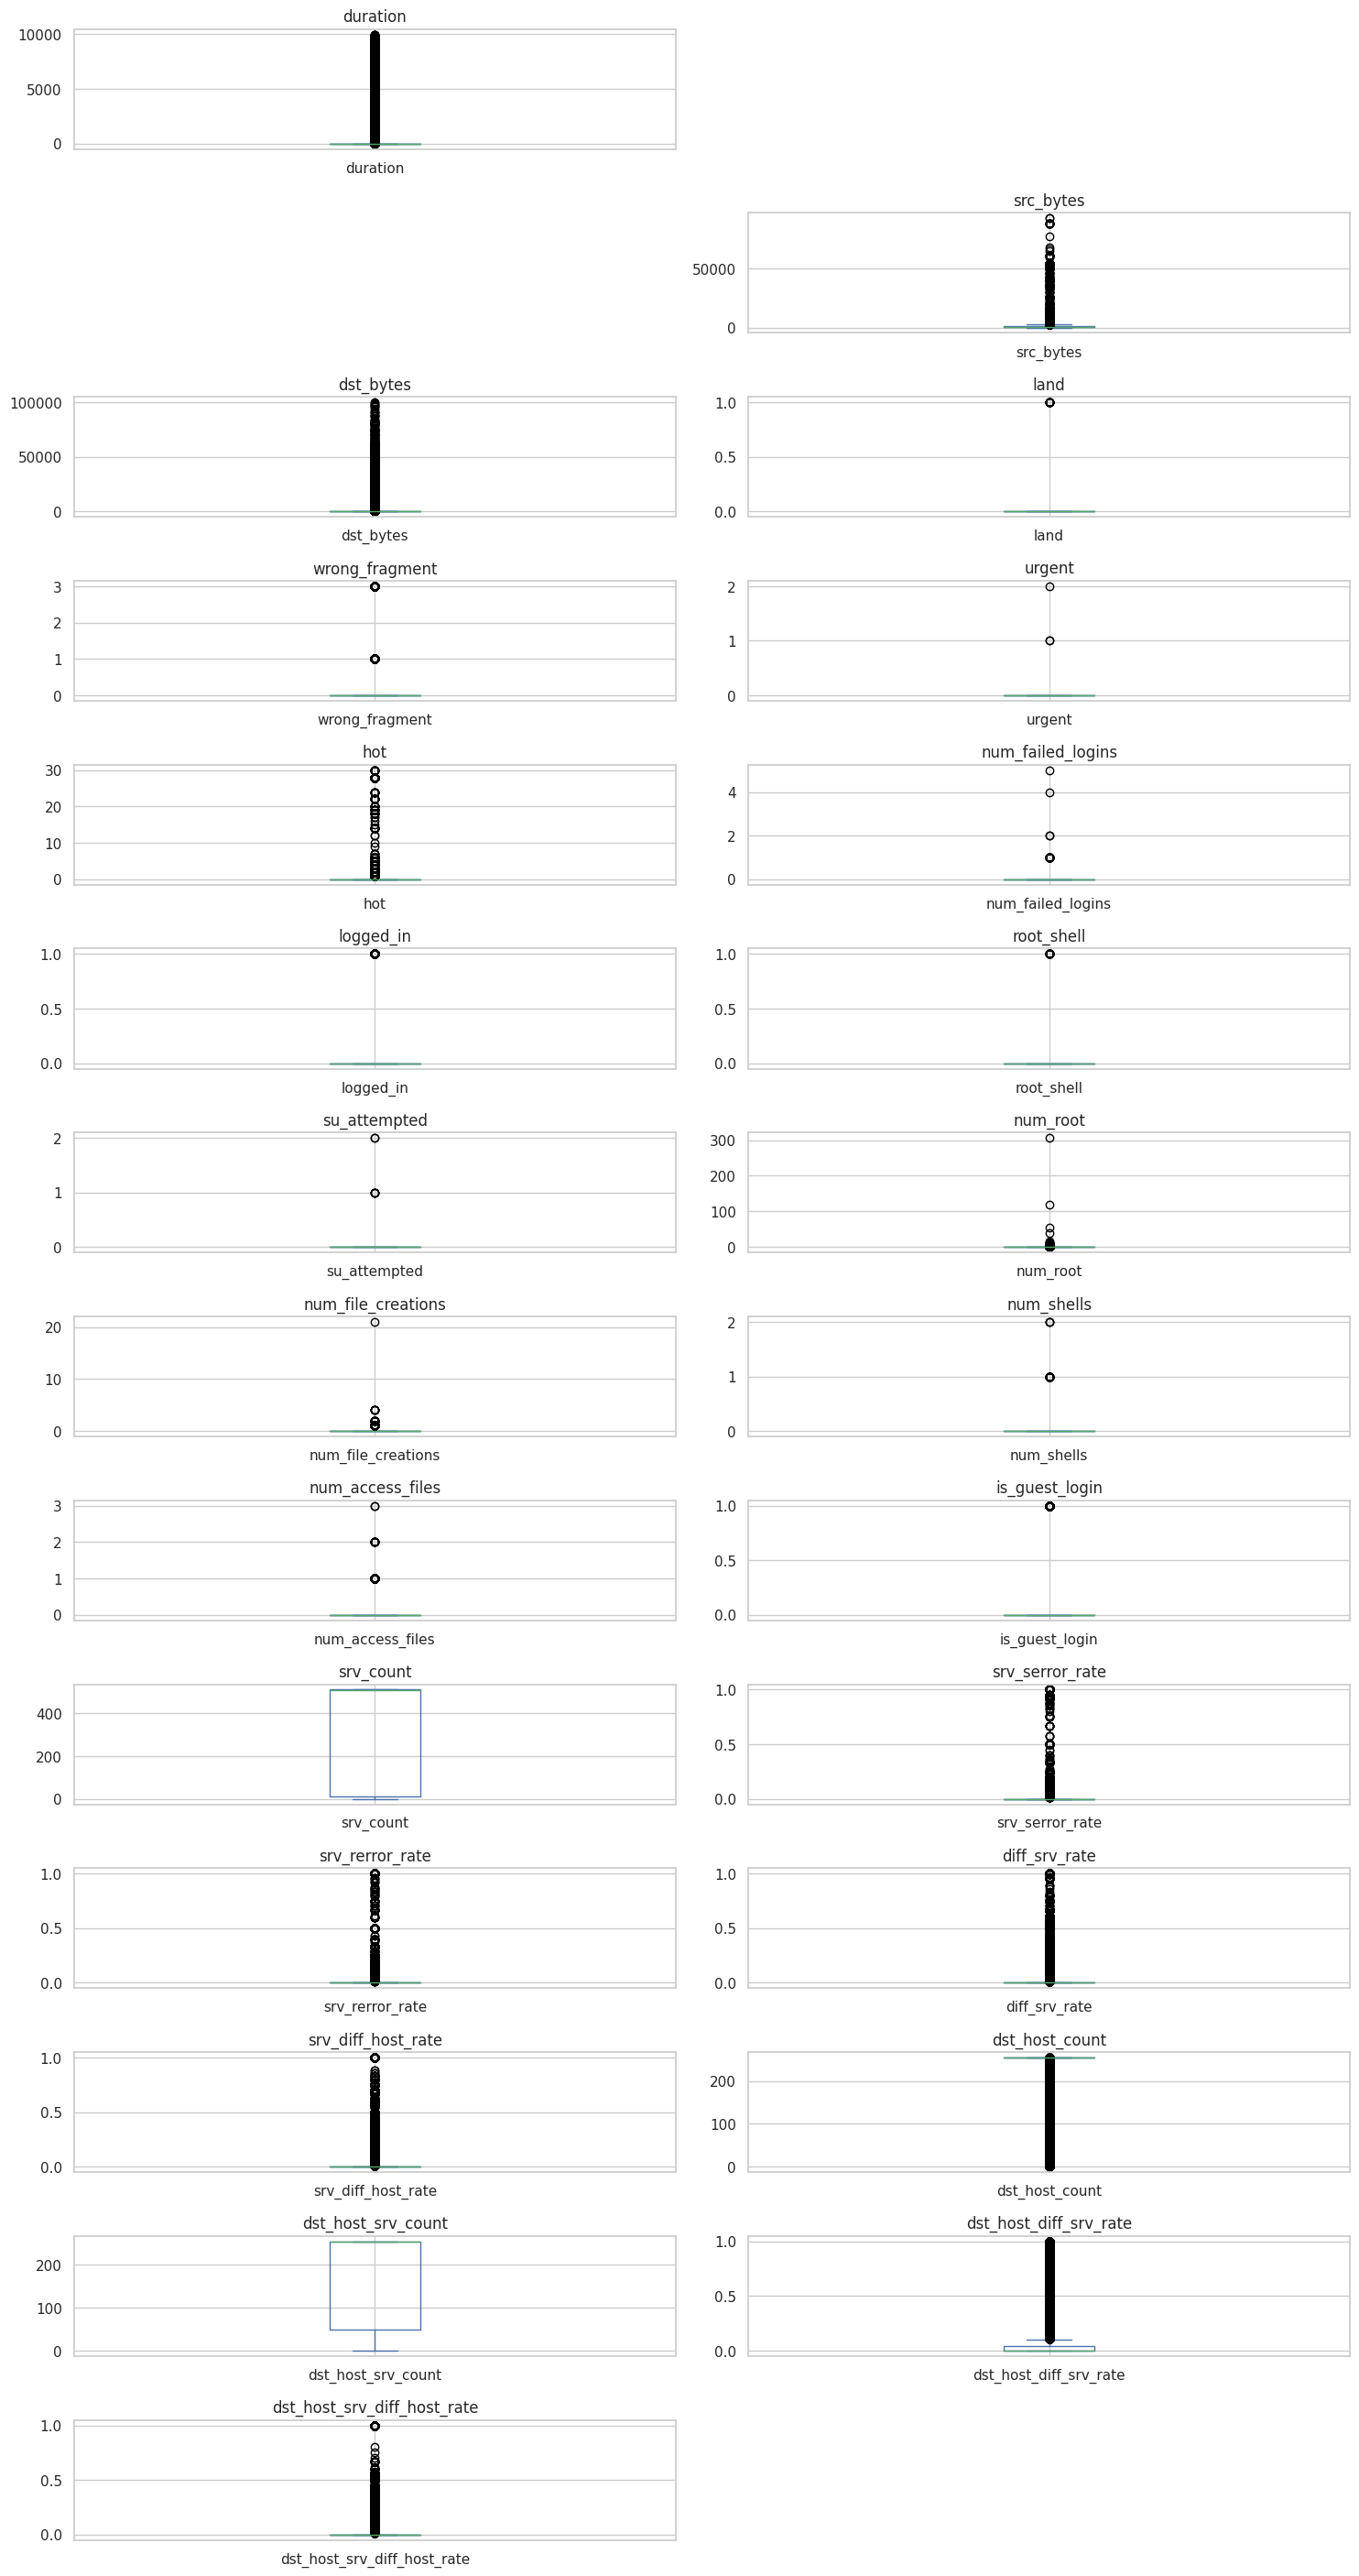

In [ ]:
num_rows = 15
num_cols = (len(df.columns) + num_rows - 1) // num_rows

plt.figure(figsize=(15, 30))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i+1)
        df[column].plot(kind='box')
        plt.title(column)

plt.tight_layout()
plt.show()


# **DIMENSION REDUCTION**

## **PCA**

In [ ]:
X.shape

(493126, 42)

In [ ]:
X_test.shape

(146149, 41)

In [ ]:
X_vald.shape

(146149, 41)

In [ ]:
n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])



print('Explained variance ratio:', pca.explained_variance_ratio_)

explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)
print('The total variance caputured after PCA', total_variance_explained)

Explained variance ratio: [0.14011069 0.10808056 0.07136537 0.07057241 0.05754187 0.04844697
 0.04692349 0.04157033 0.03856759 0.03842618 0.03802912 0.0377722
 0.03533397 0.03313714 0.0325062  0.03030386 0.0296878  0.02771373
 0.02312917 0.01294785]
The total variance caputured after PCA 0.9621664998120509


In [ ]:
X_test['flag_RSTOS0'] = 0
X_vald['flag_RSTOS0'] = 0


In [ ]:
#null_rows = X_test_reordered[X_test_reordered.isnull().any(axis=1)]

# Display the rows with NaN values
#print(null_rows)


In [ ]:
X_test_reordered = X_test[X.columns]
X_test_reordered.dropna(inplace=True)

X_test_pca = pca.transform(X_test_reordered)
principal_df_test = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
X_vald_reordered = X_vald[X.columns]
X_vald_reordered.dropna(inplace=True)

X_vald_pca = pca.transform(X_vald_reordered)
principal_df_vald = pd.DataFrame(data=X_vald_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
principal_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.448638  2.981946 -0.476670 -0.001409  0.463231 -0.608337  0.095040   
1  2.124619  5.826871 -1.498621  0.241146 -0.184977  0.843051 -0.289914   
2  1.556274  3.844131 -0.682952  0.077348  0.319395 -0.368977  0.003392   
3  1.453725  3.440000 -0.718173  0.043080  0.216551  0.118493 -0.051596   
4  1.468026  3.720455 -0.089836 -0.533253  0.172497  0.234746 -0.132035   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.034092 -0.012761 -0.199983  0.092383 -0.430421  0.074232 -0.922120   
1  1.719569 -0.023924  0.003841 -0.172624 -1.011454 -0.194583  2.155547   
2  0.200349 -0.012048 -0.165871  0.124628 -0.436903  0.270733 -1.007184   
3  0.467147 -0.012206 -0.190739  0.098113 -0.600963  0.164134 -0.503343   
4  0.496164 -0.006594 -0.171892  0.098317 -0.566099  0.218285 -0.492985   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.178317  0.286583  0.220040 -0.229523 -1.599858 -0.045850  
1 -0.083218 -2.966441 -0.314133 -2.492801  1.443019  0.060863  
2  0.121728  0.662820  0.151338  0.568691 -1.186077 -0.031539  
3  0.021217  0.451581  0.174529  0.297010 -2.167347 -0.082660  
4 -0.036311  0.541399  0.136157  0.495805 -1.952244 -0.072939

In [ ]:
principal_df_test.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.490602 -0.518850  0.081084  0.049234 -0.081509 -0.046623  0.026910   
1 -1.493539 -0.516799  0.083175  0.047497 -0.081932 -0.052898  0.028598   
2 -1.492550 -0.519615  0.081264  0.049287 -0.081978 -0.046366  0.026899   
3 -0.030186 -0.166899 -0.045119  0.041244  0.150616 -0.242725  0.043869   
4 -1.493539 -0.516799  0.083175  0.047497 -0.081932 -0.052898  0.028598   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.175559  0.003117  0.051374 -0.004342 -0.013032  0.031782  0.019286   
1  0.167236  0.000983  0.053626 -0.005175 -0.002101  0.032887  0.033185   
2  0.175623  0.003127  0.051550 -0.004335 -0.012978  0.031809  0.019429   
3  0.197532 -0.000390 -0.106236 -0.011466 -0.031125  0.023453 -0.051833   
4  0.167236  0.000983  0.053626 -0.005175 -0.002101  0.032887  0.033185   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.000925 -0.048077 -0.052618  0.223134  0.203244  0.020314  
1 -0.002696 -0.046431 -0.053381  0.225747  0.201167  0.020296  
2  0.000919 -0.048355 -0.052798  0.223693  0.203766  0.020400  
3 -0.007792  0.182445  0.071412 -0.162962 -0.066005 -0.032712  
4 -0.002696 -0.046431 -0.053381  0.225747  0.201167  0.020296

In [ ]:
principal_df_vald.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.488769 -0.508910  0.091659  0.038771 -0.078707 -0.058964  0.029106   
1  0.750080  3.737408 -0.810127  0.112363  0.064015  0.049259 -0.049847   
2  2.410863 -0.765856 -0.124799  0.025949 -0.641517  1.195964 -0.290485   
3 -1.490719 -0.509675  0.091839  0.038824 -0.079176 -0.058707  0.029095   
4  3.450131 -1.763162  0.055745 -0.113553  2.203901 -0.613421  0.072224   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.168046  0.001237  0.053417 -0.002008  0.001132  0.033008  0.024475   
1  0.757335 -0.021318 -0.074528  0.020830 -0.599953  0.100586 -0.003958   
2 -1.667644  0.045330 -0.109853 -0.350651  0.343169 -0.050303 -0.317567   
3  0.168110  0.001247  0.053593 -0.002000  0.001187  0.033035  0.024619   
4  0.865482 -0.064276  0.176687  0.169118 -0.025491  0.186434  0.544995   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.001479 -0.043616 -0.053690  0.227534  0.215125  0.021906  
1 -0.000638 -0.254030  0.002671  0.097040 -1.323589 -0.090929  
2  0.059532  0.772011  0.360395 -0.966787  0.268187  0.027273  
3  0.001473 -0.043894 -0.053870  0.228095  0.215648  0.021991  
4 -0.169764  0.219172 -0.069515  0.425414  0.377886  0.015392

In [ ]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Main Label, dtype: object

## **t-SNE**

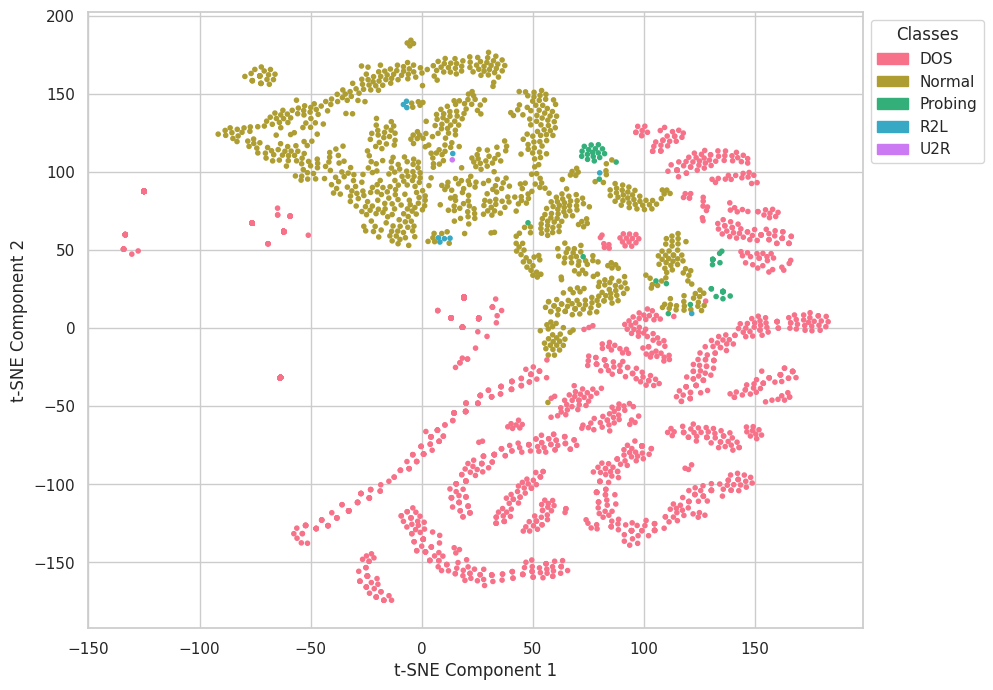

In [ ]:
sample_size = 5000
sample_indices = np.random.choice(principal_df.shape[0], size=sample_size, replace=False)
X_sample = principal_df.iloc[sample_indices]
y_sample = y.iloc[sample_indices]

label_encoder = LabelEncoder()
y_sample_encoded = label_encoder.fit_transform(y_sample)

colors = sns.color_palette('husl', len(label_encoder.classes_))
color_dict = dict(zip(label_encoder.classes_, colors))
color_list = [color_dict[label] for label in y_sample]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_list, marker='.')
legend_handles = [mpatches.Patch(color=color_dict[label], label=label) for label in label_encoder.classes_]
plt.legend(handles=legend_handles, title='Classes', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


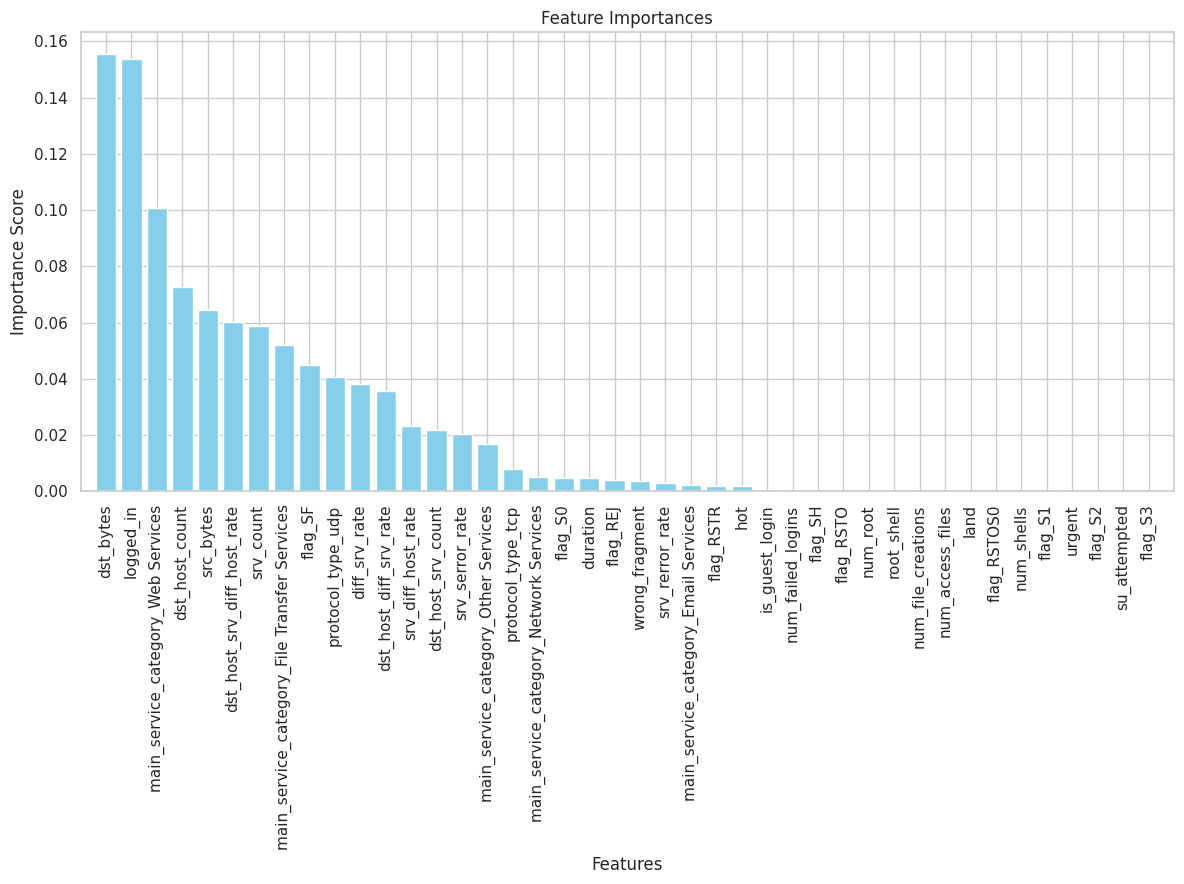

In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 9))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center",  capsize=5)
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



In [ ]:
threshold = 0.005

unimportant_indices = np.where(importances <= threshold)[0]

unimportant_features = X.columns[unimportant_indices]

X_selected = X[unimportant_features]

print(unimportant_features)

Index(['duration', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'srv_rerror_rate',
       'main_service_category_Email Services',
       'main_service_category_Network Services', 'flag_REJ', 'flag_RSTO',
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SH'],
      dtype='object')


## **MODEL BUILDING**

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=42)
rfc.fit(principal_df, y)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_pred = rfc.predict(principal_df_vald)
accuracy = accuracy_score(y_vald, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7945384504854635


In [ ]:
rfc = RandomForestClassifier()

params = rfc.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


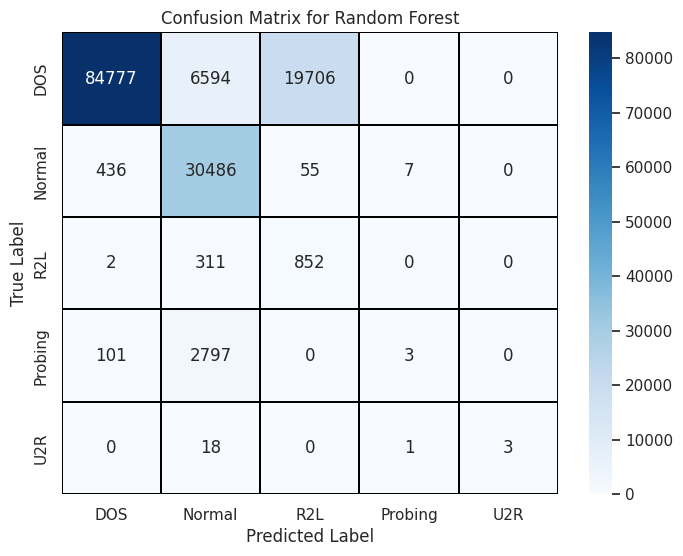

In [ ]:
cm = confusion_matrix(y_vald, y_pred)
class_labels = ['DOS', 'Normal', 'R2L', 'Probing', 'U2R']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidth = 0.01,linecolor = 'black',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(principal_df, y)

y_pred_prob_rf = rf_classifier.predict_proba(principal_df_vald)



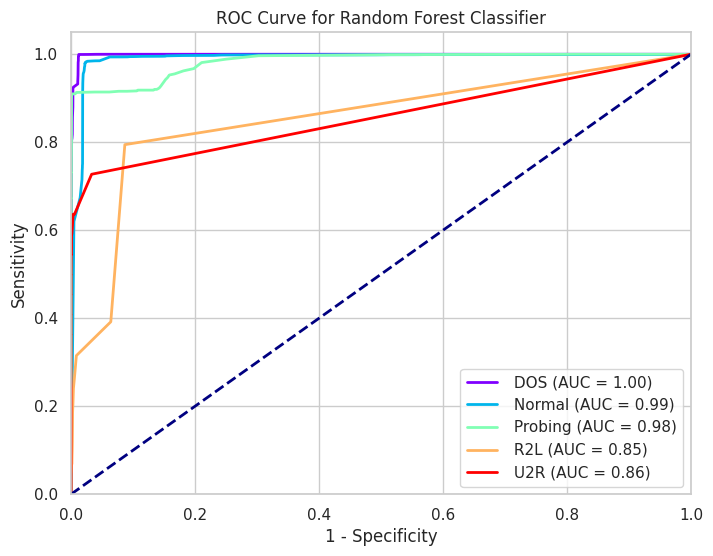

In [ ]:
fpr = dict()
tpr = dict()
roc_auc_rf = dict()

for i in range(len(rf_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_vald == rf_classifier.classes_[i], y_pred_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(rf_classifier.classes_)))
for i, color in zip(range(len(rf_classifier.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=' {0} (AUC = {1:0.2f})'.format(rf_classifier.classes_[i], roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## SVM

In [ ]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(principal_df, y)
y_pred_svm = svm_classifier.predict(principal_df_vald)

accuracy_svm = accuracy_score(y_vald, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8528282779902702


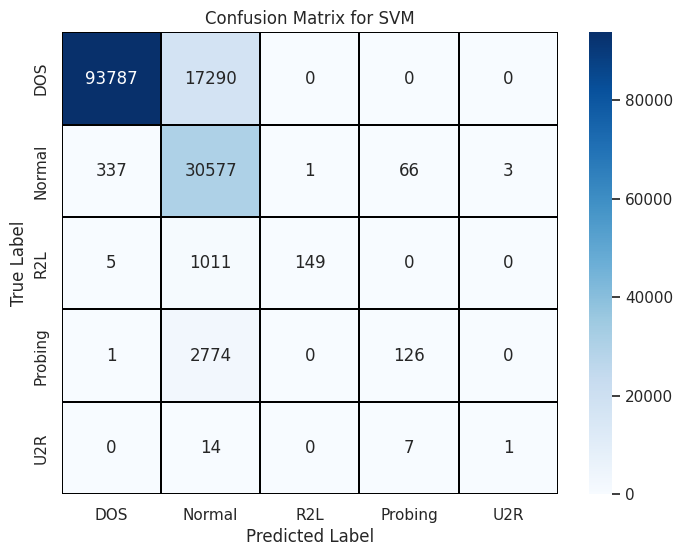

In [ ]:
cm_svm = confusion_matrix(y_vald, y_pred_svm)
class_labels = ['DOS', 'Normal', 'R2L', 'Probing', 'U2R']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',linewidth = 0.01,linecolor = 'black', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(principal_df, y)

y_pred_prob_svm = svm_classifier.decision_function(principal_df_vald)



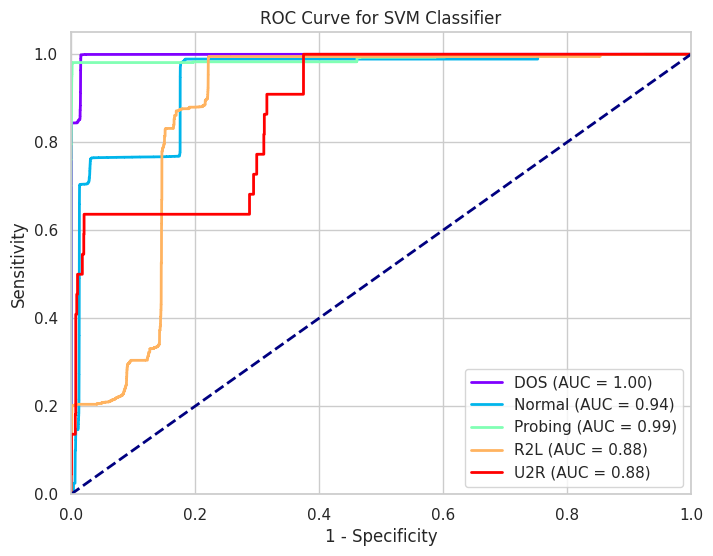

In [ ]:
fpr = dict()
tpr = dict()
roc_auc_svm = dict()

for i in range(len(svm_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_vald == svm_classifier.classes_[i], y_pred_prob_svm[:, i])
    roc_auc_svm[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(svm_classifier.classes_)))
for i, color in zip(range(len(svm_classifier.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='{0} (AUC = {1:0.2f})'.format(svm_classifier.classes_[i], roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## kNN

In [ ]:


knn = KNeighborsClassifier(n_neighbors=13, metric = 'manhattan')
knn.fit(principal_df, y)
y_pred_knn = knn.predict(principal_df_vald)

accuracy_knn = accuracy_score(y_vald, y_pred_knn)
print("Accuracy wiht kNN:", accuracy_knn)

Accuracy wiht kNN: 0.9768113363758903


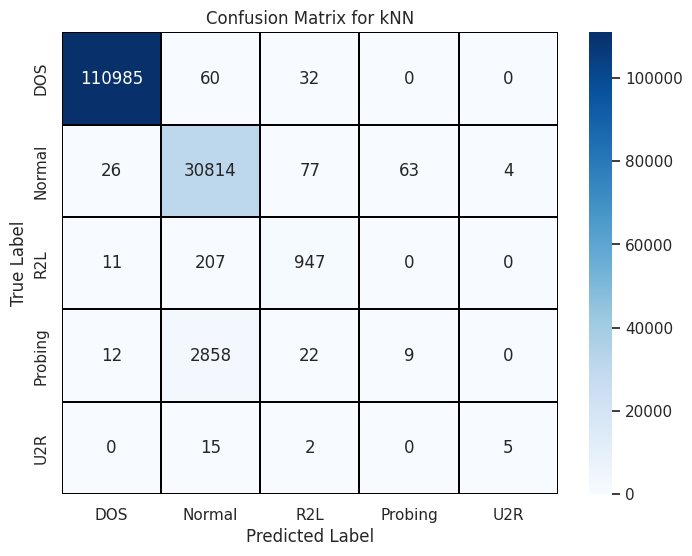

In [ ]:
cm_knn = confusion_matrix(y_vald, y_pred_knn)
class_labels = ['DOS', 'Normal', 'R2L', 'Probing', 'U2R']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',linewidth = 0.01,linecolor = 'black', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for kNN')
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(principal_df, y)

y_pred_prob_knn = knn_classifier.predict_proba(principal_df_vald)



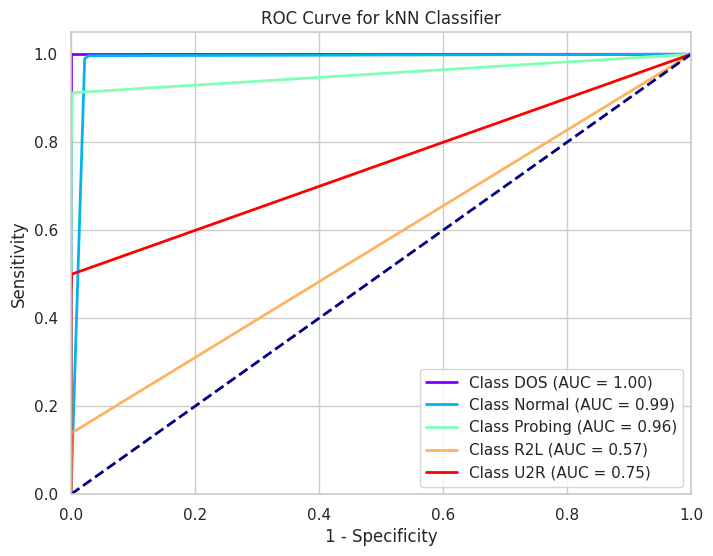

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(knn_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_vald == knn_classifier.classes_[i], y_pred_prob_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(knn_classifier.classes_)))
for i, color in zip(range(len(knn_classifier.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(knn_classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for kNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Multinomial Logistic Regression

In [ ]:



clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf.fit(principal_df, y)
y_pred_lr = clf.predict(principal_df_vald)

accuracy_lr = accuracy_score(y_vald, y_pred_lr)
print("Accuracy with Multinomial logistic Regression:", accuracy_lr)

Accuracy with Multinomial logistic Regression: 0.846512805424601


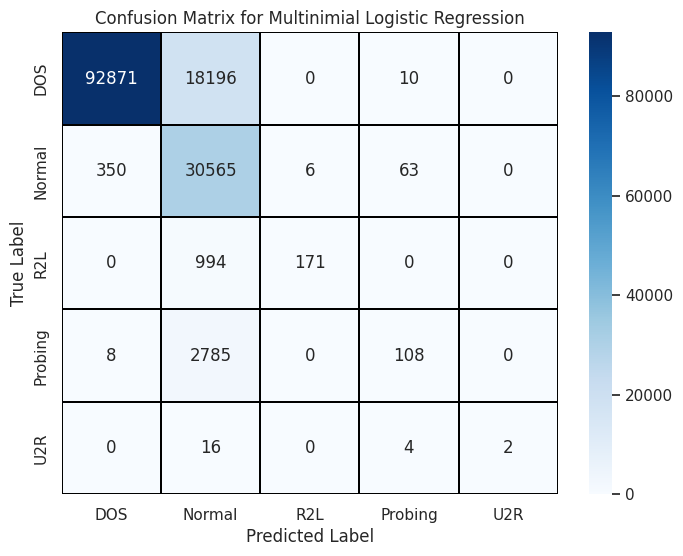

In [ ]:
cm_lr = confusion_matrix(y_vald, y_pred_lr)
class_labels = ['DOS', 'Normal', 'R2L', 'Probing', 'U2R']


plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',linewidth = 0.01,linecolor = 'black',  xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Multinimial Logistic Regression')
plt.show()

In [ ]:
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(principal_df, y)

y_pred_prob_lr = lr_classifier.predict_proba(principal_df_vald)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



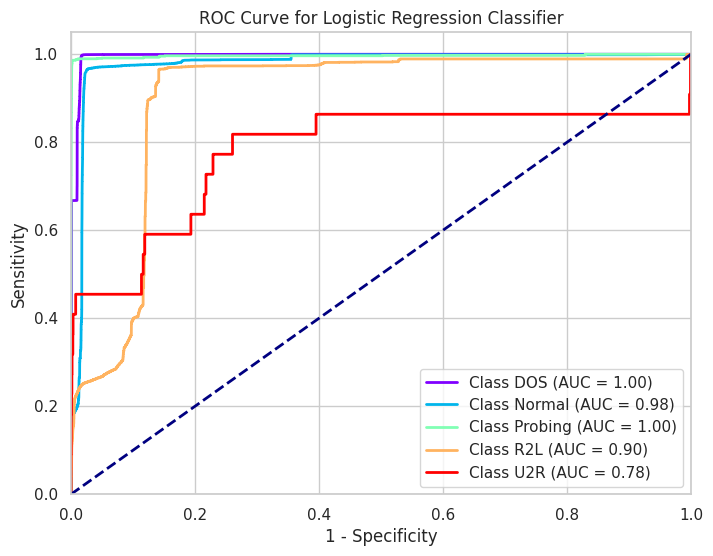

In [ ]:
fpr = dict()
tpr = dict()
roc_auc_lr = dict()

for i in range(len(lr_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_vald == lr_classifier.classes_[i], y_pred_prob_lr[:, i])
    roc_auc_lr[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(lr_classifier.classes_)))
for i, color in zip(range(len(lr_classifier.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(lr_classifier.classes_[i], roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for Logistic Regression Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<ipython-input-122-d5bac4b69fac>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




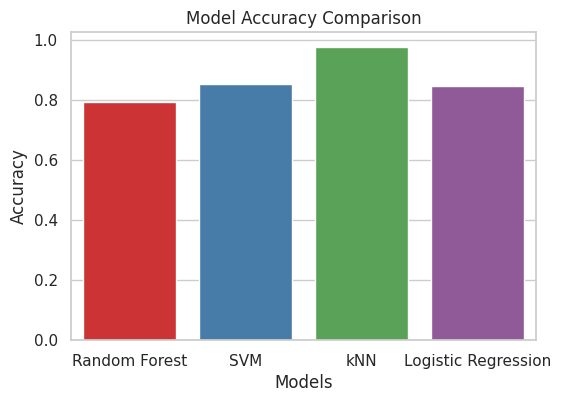

In [ ]:
models = ["Random Forest", "SVM", "kNN", "Logistic Regression"]
accuracies = [accuracy, accuracy_svm, accuracy_knn, accuracy_lr]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="Set1")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [ ]:

print("Classification Report for Random Forest")
print(classification_report(y_vald, y_pred))

print("Classification Report for SVM")
print(classification_report(y_vald, y_pred_svm))

print("Classification Report for kNN")
print(classification_report(y_vald, y_pred_knn))

print("Classification Report for Logistic Regression")
print(classification_report(y_vald, y_pred_lr))

Classification Report for Random Forest
              precision    recall  f1-score   support

         DOS       0.99      0.76      0.86    111077
      Normal       0.76      0.98      0.86     30984
     Probing       0.04      0.73      0.08      1165
         R2L       0.27      0.00      0.00      2901
         U2R       1.00      0.14      0.24        22

    accuracy                           0.79    146149
   macro avg       0.61      0.52      0.41    146149
weighted avg       0.92      0.79      0.84    146149

Classification Report for SVM
              precision    recall  f1-score   support

         DOS       1.00      0.84      0.91    111077
      Normal       0.59      0.99      0.74     30984
     Probing       0.99      0.13      0.23      1165
         R2L       0.63      0.04      0.08      2901
         U2R       0.25      0.05      0.08        22

    accuracy                           0.85    146149
   macro avg       0.69      0.41      0.41    146149
weighte

In [ ]:
micro_precision = []
micro_recall = []
micro_f1_score = []
macro_precision = []
macro_recall = []
macro_f1_score = []
precision = {}
recall = {}
f1_score = {}

models = ["Random Forest", "SVM", "kNN", "Logistic Regression"]

for model in models:
    if model == "Random Forest":
        y_pred = y_pred
    elif model == "SVM":
        y_pred = y_pred_svm
    elif model == "kNN":
        y_pred = y_pred_knn
    else:
        y_pred = y_pred_lr

    precision[model], recall[model], f1_score[model], _ = precision_recall_fscore_support(y_vald, y_pred, average=None)
    micro_precision.append(precision_recall_fscore_support(y_vald, y_pred, average='micro')[0])
    micro_recall.append(precision_recall_fscore_support(y_vald, y_pred, average='micro')[1])
    micro_f1_score.append(precision_recall_fscore_support(y_vald, y_pred, average='micro')[2])
    macro_precision.append(precision_recall_fscore_support(y_vald, y_pred, average='macro')[0])
    macro_recall.append(precision_recall_fscore_support(y_vald, y_pred, average='macro')[1])
    macro_f1_score.append(precision_recall_fscore_support(y_vald, y_pred, average='macro')[2])

df_viz = pd.DataFrame({
    "Micro Precision": micro_precision,
    "Macro Precision": macro_precision,
    "Micro Recall": micro_recall,
    "Macro Recall": macro_recall,
    "Micro F1 Score": micro_f1_score,
    "Macro F1 Score": macro_f1_score
}, index=models)

df_viz

Micro Precision  Macro Precision  Micro Recall  \
Random Forest               0.794538         0.613198      0.794538   
SVM                         0.852828         0.692935      0.852828   
kNN                         0.976811         0.692898      0.976811   
Logistic Regression         0.846513         0.825523      0.846513   

                     Macro Recall  Micro F1 Score  Macro F1 Score  
Random Forest            0.523177        0.794538        0.408023  
SVM                      0.409598        0.852828        0.407763  
kNN                      0.607387        0.976811        0.624136  
Logistic Regression      0.419498        0.846513        0.426477

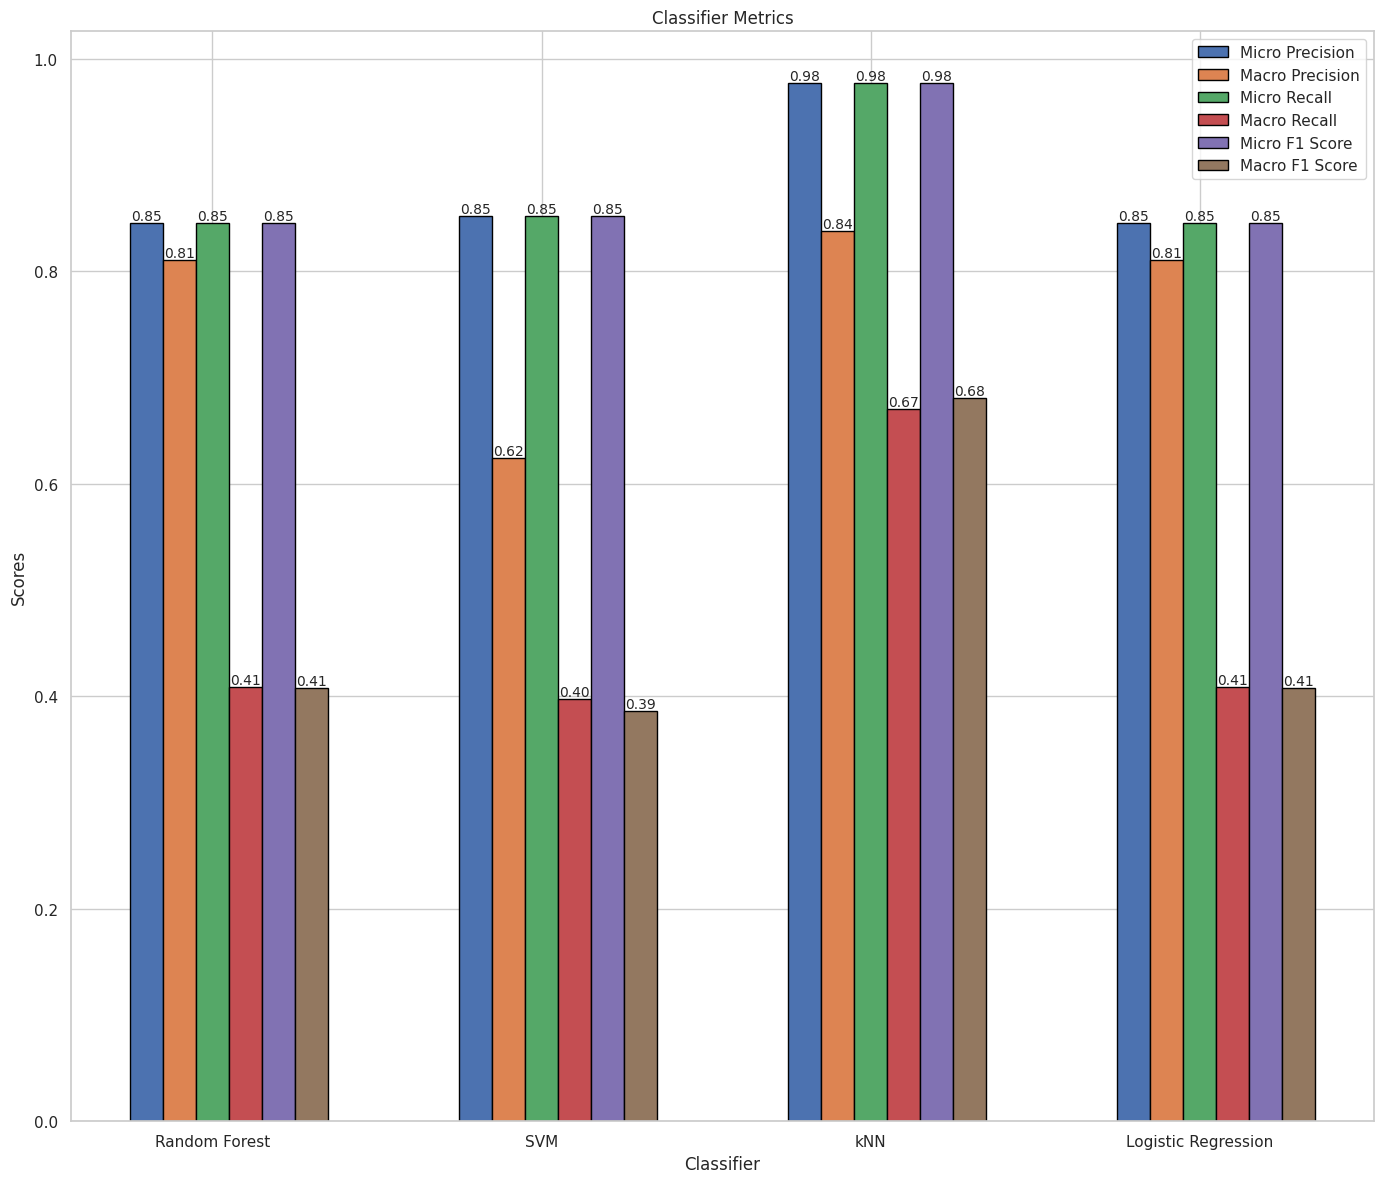

In [ ]:
classifiers = ['Random Forest', 'SVM', 'kNN', 'Logistic Regression']
metrics = ['Micro Precision', 'Macro Precision', 'Micro Recall', 'Macro Recall', 'Micro F1 Score', 'Macro F1 Score']

values = {
    'Random Forest': [0.845748, 0.810953, 0.845748, 0.409161, 0.845748, 0.407633],
    'SVM': [0.852125, 0.624805, 0.852125, 0.397427, 0.852125, 0.386027],
    'kNN': [0.977154, 0.837950, 0.977154, 0.670336, 0.977154, 0.681211],
    'Logistic Regression': [0.845748, 0.810953, 0.845748, 0.409161, 0.845748, 0.407633]
}

edge_colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']

bar_width = 0.1
index = np.arange(len(classifiers))

plt.figure(figsize=(14, 12))

for i, metric in enumerate(metrics):
    values_list = [values[classifier][i] for classifier in classifiers]
    bars = plt.bar(index + i * bar_width, values_list, bar_width, label=metric, edgecolor='black')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Classifier Metrics')
plt.xticks(index + bar_width * 2, classifiers)
plt.legend(loc='upper right')

for bars in plt.gca().containers:
    plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
print(cm)
print(cm_svm)

[[84777  6594 19706     0     0]
 [  436 30486    55     7     0]
 [    2   311   852     0     0]
 [  101  2797     0     3     0]
 [    0    18     0     1     3]]
[[93787 17290     0     0     0]
 [  337 30577     1    66     3]
 [    5  1011   149     0     0]
 [    1  2774     0   126     0]
 [    0    14     0     7     1]]


In [ ]:
print(cm_knn)
print(cm_lr)

[[110985     60     32      0      0]
 [    26  30814     77     63      4]
 [    11    207    947      0      0]
 [    12   2858     22      9      0]
 [     0     15      2      0      5]]
[[92871 18196     0    10     0]
 [  350 30565     6    63     0]
 [    0   994   171     0     0]
 [    8  2785     0   108     0]
 [    0    16     0     4     2]]


# Final Model Performance Evaluation

In [ ]:
y_pred_knn = knn.predict(principal_df_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy wiht kNN:", accuracy_knn)

Accuracy wiht kNN: 0.9745738937659512


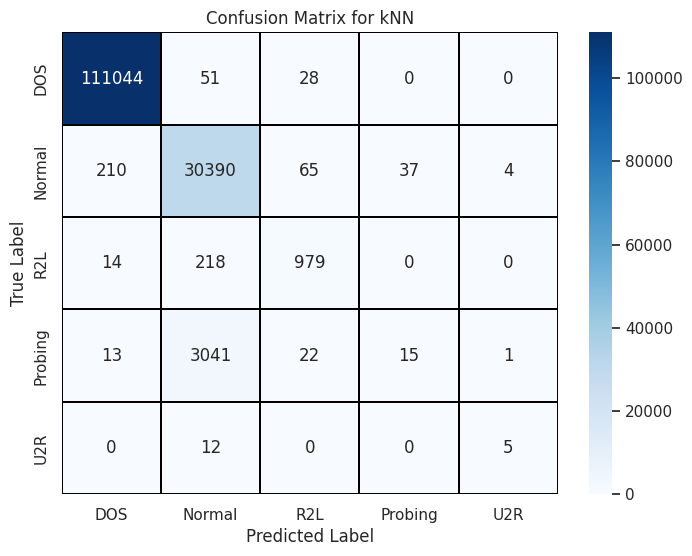

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
class_labels = ['DOS', 'Normal', 'R2L', 'Probing', 'U2R']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',linewidth = 0.01,linecolor = 'black', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for kNN')
plt.show()

In [ ]:
print("Classification Report for knn:")
print(classification_report(y_test, y_pred_knn))

Classification Report for knn:
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00    111123
      Normal       0.90      0.99      0.94     30706
     Probing       0.89      0.81      0.85      1211
         R2L       0.29      0.00      0.01      3092
         U2R       0.50      0.29      0.37        17

    accuracy                           0.97    146149
   macro avg       0.72      0.62      0.63    146149
weighted avg       0.96      0.97      0.96    146149



In [ ]:
y_pred_prob = knn.predict_proba(principal_df_test)

In [ ]:
print(y_pred_prob)

[[1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 ...
 [1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.15384615 0.         0.84615385 0.        ]]


In [ ]:
print("Propensity Scores:")
prop_knn = pd.DataFrame(y_pred_prob, columns=knn.classes_).head()
prop_knn.head()

Propensity Scores:


DOS  Normal  Probing  R2L  U2R
0  1.0     0.0      0.0  0.0  0.0
1  1.0     0.0      0.0  0.0  0.0
2  1.0     0.0      0.0  0.0  0.0
3  0.0     1.0      0.0  0.0  0.0
4  1.0     0.0      0.0  0.0  0.0

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(knn.classes_)):
    fpr[knn.classes_[i]], tpr[knn.classes_[i]], _ = roc_curve(y_test == knn.classes_[i], y_pred_prob[:, i])
    roc_auc[knn.classes_[i]] = auc(fpr[knn.classes_[i]], tpr[knn.classes_[i]])




In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(knn.classes_)))
plt.figure(figsize=(10, 8))
for i, color in zip(range(len(knn.classes_)), colors):
    plt.plot(fpr[knn.classes_[i]], tpr[knn.classes_[i]], color=color, lw=2, label='{0} (AUC = {1:0.2f})'.format(knn.classes_[i], roc_auc[knn.classes_[i]]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for kNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {
    'max_depth': [None, 10, 30, 50],
}


halving_search = HalvingGridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, factor=3, resource='n_estimators', max_resources=100)
halving_search.fit(principal_df, y)

best_params = halving_search.best_params_
best_score = halving_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


In [ ]:
best_params = {}
for model_name, model_search in halving_search.named_estimators_.items():
    best_params[model_name] = model_search.best_params_

for model_name, params in best_params.items():
    print(f"Best parameters for {model_name}: {params}")


In [ ]:

best_params = {}
for model_name, model_search in halving_search.named_estimators_.items():
    best_params[model_name] = model_search.best_params_

plt.figure(figsize=(12, 8))
for i, (model_name, params) in enumerate(best_params.items()):
    plt.barh(model_name, len(params), color='skyblue')
    for j, param in enumerate(params):
        plt.text(len(params) + 0.1, i, f'{param}: {params[param]}', va='center', ha='left')

plt.xlabel('Number of Parameters')
plt.title('Best Parameters for Each Model')
plt.show()


In [ ]:
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {

    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

halving_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2, resource='n_neighbors', max_resources=20, scoring='accuracy', n_jobs=-1)
halving_search.fit(principal_df, y)

best_params = halving_search.best_params_
print("Best hyperparameters:", best_params)

best_score = halving_search.best_score_
print("Best score:", best_score)


In [ ]:
param_grid_solver = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

halving_search_solver = HalvingGridSearchCV(lr, param_grid_solver, cv=5, n_jobs=-1)
halving_search_solver.fit(principal_df, y)

best_params_solver = halving_search_solver.best_params_
best_score_solver = halving_search_solver.best_score_
print("Best Hyperparameters for solver:", best_params_solver)
print("Best Score for solver:", best_score_solver)


In [ ]:
param_grid_max_iter = {'max_iter': [100, 200, 300]}

halving_search_max_iter = HalvingGridSearchCV(lr, param_grid_max_iter, cv=5, n_jobs=-1)
halving_search_max_iter.fit(principal_df, y)

best_params_max_iter = halving_search_max_iter.best_params_
best_score_max_iter = halving_search_max_iter.best_score_
print("Best Hyperparameters for max_iter:", best_params_max_iter)
print("Best Score for max_iter:", best_score_max_iter)
